In [1]:
import pandas as pd
import os

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'OD_2017/'
destination_folder_path = data_folder + 'OD_2017/'

In [2]:
filename = 'OD_2017_v1.csv'
data = pd.read_csv(source_folder_path + filename)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
0,1,36,333743,7394463,10001,1,15.416667,1,1,6092017,1,1,1,2,1,100011,1,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,1,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.132647,3.0,2,1.0,36.0,333743.0,7394463.0,3.0,36.0,333104.0,7394476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,5.0,45.0,NaN,5.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,1
1,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,0,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.132647,3.0,2,3.0,36.0,333104.0,7394476.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,15.0,45.0,NaN,15.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,2
2,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,1,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.882487,3.0,3,1.0,36.0,333743.0,7394463.0,82.0,36.0,327503.0,7392159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,9.0,0.0,10.0,9.0,50.0,20.0,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,6651.77,3
3,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.882487,3.0,3,82.0,36.0,327503.0,7392159.0,84.0,36.0,329431.0,7395939.0,93.0,36.0,329861.0,7397268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,2.0,1.0,4.0,NaN,NaN,17.0,0.0,20.0,18.0,0.0,1.0,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4243.30,4
4,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.882487,3.0,3,84.0,36.0,329431.0,7395939.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,2.0,2.0,12.0,NaN,NaN,NaN,22.0,50.0,1.0,23.0,30.0,1.0,40.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4557.62,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [5]:
data['FE_VIA'].sum()

42006659.869834

In [6]:
# data_sp['FE_VIA'].sum()

In [7]:
data_sp = data[(data['MUNI_O'] == 36) | (data['MUNI_D'] == 36)]
# data_sp = data[(data['MUNI_DOM'] == 36)]

In [8]:
data_sp['FE_VIA'].sum()

27757497.458

In [9]:
df_grouped  = data.groupby('TIPVG')['FE_VIA'].sum()

In [10]:
df_grouped

TIPVG
1.0    1.529414e+07
2.0    1.298567e+07
3.0    1.334988e+07
4.0    3.769752e+05
Name: FE_VIA, dtype: float64

TIPVG

1 - Coletivo
2 - Individual
3 - A pé
4 - Bicicleta

In [11]:
def calculate_modal_distribution(df):
    df_grouped  = df.groupby('TIPVG')['FE_VIA'].sum()
    index_map = {1: 'Coletivo', 2: 'Individual', 3: 'A pé', 4: 'Bicicleta'}
    df_grouped = df_grouped[df_grouped.index.isin(list(index_map.keys()))]
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    # df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [12]:
df = calculate_modal_distribution(data)
df

,FE_VIA
TIPVG,
Coletivo,36.408850
Individual,30.913353
A pé,31.780379
Bicicleta,0.897418


In [13]:
df.values.sum()

99.99999999999999

In [14]:
calculate_modal_distribution(data_sp)

,FE_VIA
TIPVG,
Coletivo,41.260090
Individual,29.897634
A pé,28.052450
Bicicleta,0.789826


In [15]:
data_sp['TIPVG'].value_counts(normalize=True)

2.0    0.369837
1.0    0.340134
3.0    0.281893
4.0    0.008135
Name: TIPVG, dtype: float64

In [16]:
df = data
df_grouped  = df.groupby('SEXO')['FE_VIA'].sum()
df_percentage = df_grouped / df_grouped.sum() * 100
df_percentage = pd.DataFrame(df_percentage)
index_map = {1: 'Masculino', 2: 'Feminino'}
df_percentage = df_percentage[df_percentage.index.isin([1,2])]
df_percentage.index = df_percentage.index.map(index_map)
df_percentage

,FE_VIA
SEXO,
Masculino,50.087606
Feminino,49.912394


In [17]:
def calculate_gender_distribution(df):
    df_grouped  = df.groupby('SEXO')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'Masculino', 2: 'Feminino'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [18]:
calculate_gender_distribution(data)

,FE_PESS
SEXO,
Masculino,48.787459
Feminino,51.212541


In [19]:
calculate_gender_distribution(data_sp)

,FE_PESS
SEXO,
Masculino,50.036458
Feminino,49.963542


In [20]:
bike_trips = data_sp[data_sp['TIPVG'] == 4]

In [21]:
len(bike_trips)

963

In [22]:
calculate_gender_distribution(bike_trips)

,FE_PESS
SEXO,
Masculino,90.653199
Feminino,9.346801


## Age

<AxesSubplot:ylabel='Frequency'>

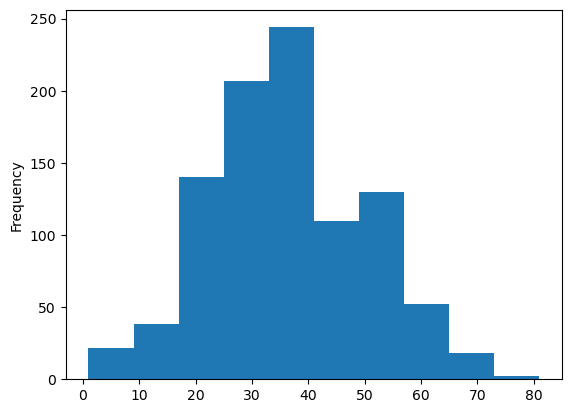

In [23]:
bike_trips['IDADE'].plot(kind='hist')


In [24]:
data_sp['IDADE']

0         59
1         59
2         21
3         21
4         21
          ..
183030    40
183069    38
183070    38
183071    38
183072    38
Name: IDADE, Length: 118371, dtype: int64

In [25]:
data_sp['FE_VIA']

0         22.132647
1         22.132647
2         18.882487
3         18.882487
4         18.882487
            ...    
183030    83.316800
183069    55.549985
183070    55.549985
183071    55.549985
183072    55.549985
Name: FE_VIA, Length: 118371, dtype: float64

In [26]:
data_sp['IDADE']*data_sp['FE_VIA']

0         1305.826173
1         1305.826173
2          396.532227
3          396.532227
4          396.532227
             ...     
183030    3332.672000
183069    2110.899430
183070    2110.899430
183071    2110.899430
183072    2110.899430
Length: 118371, dtype: float64

In [27]:
import seaborn as sns
from matplotlib.pyplot import figure
from  matplotlib.ticker import FuncFormatter

def plot_histogram_age_fe_via(trips, mode, save = False, title = False):
    
    variable = 'IDADE'
    # list_bins = [0,10,20,25,35,45,55,65,75,90]
    # list_bins = [0,15,20,25,35,45,55,65,75,100]
    list_bins = list(range(0,90,5))

    # limit_bins= 100+1
    # step = 10
    # list_bins = list(range(0,limit_bins,step))

    sns.set(rc={'figure.figsize':(20,11)})

    
    # ax = sns.histplot(data=trips[variable], bins = list_bins, stat='percent', hist_kws={'weights': trips['FE_VIA']})
    # ax = sns.histplot(data=trips[variable], bins = list_bins, stat='percent', weights= list(trips['FE_VIA']))
    ax = sns.histplot(data=trips, x=variable, bins = list_bins, weights= 'FE_VIA')
    # ax = sns.histplot(data=trips[variable], bins=list_bins, stat='percent', hist_kws={'weights': trips['FE_VIA']})
    # ax = sns.distplot(a=trips[variable], hist=True,bins = list_bins, hist_kws={'weights': trips['FE_VIA']})
    
    for i in ax.containers:
        ax.bar_label(i,fmt='%.1f', fontsize=25)
    
    # tickers for every 20 minutes
    # ax.set_xticks(range(0,limit_bins,step), size = 10)
    ax.set_xticks(list_bins)
    figure(figsize=(12, 6), dpi=80)

    # ax.set_ylim(bottom = 0, top = 35)

    ax.axes.set_title('Distribuição da idade para ' + mode,fontsize=30, pad = 15)
    ax.set_xlabel('Idade (anos)',fontsize=25, labelpad = 15)
    ax.set_ylabel('Porcentagem de viagens (%)',fontsize=25, labelpad = 15)

    ax.set_yticklabels(ax.get_yticks(), size=25)

    ax.set_xticklabels(ax.get_xticks(), size=25)

    # ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x//60))

    if save:
        ax.figure.savefig(data_folder + 'charts/histograms/' + title, bbox_inches='tight')

In [28]:
import seaborn as sns
from matplotlib.pyplot import figure
from  matplotlib.ticker import FuncFormatter

def plot_histogram_age(trips, mode, save = False, title = False):
    
    variable = 'IDADE'
    # list_bins = [0,10,20,25,35,45,55,65,75,90]
    list_bins = [0,15,25,35,45,55,65,75,100]
    list_bins = list(range(0,90,5))

    # list_bins = list(range(0,90,5))

    # limit_bins= 100+1
    # step = 10
    # list_bins = list(range(0,limit_bins,step))

    sns.set(rc={'figure.figsize':(20,11)})

    
    # ax = sns.histplot(data=trips, x=variable, stat='percent', bins = list_bins, weights= 'FE_VIA')
    ax = sns.histplot(data=trips, x=variable, stat='percent', bins = list_bins, weights= 'FE_PESS')
    # ax = sns.histplot(data=trips, x=variable, stat='percent', bins = list_bins)
    
    for i in ax.containers:
        ax.bar_label(i,fmt='%.1f', fontsize=25)
    
    # tickers for every 20 minutes
    # ax.set_xticks(range(0,limit_bins,step), size = 10)
    ax.set_xticks(list_bins)
    figure(figsize=(12, 6), dpi=80)

    # ax.set_ylim(bottom = 0, top = 35)

    ax.axes.set_title('Distribuição da idade para ' + mode,fontsize=30, pad = 15)
    ax.set_xlabel('Idade (anos)',fontsize=25, labelpad = 15)
    ax.set_ylabel('Porcentagem de viagens (%)',fontsize=25, labelpad = 15)

    ax.set_yticklabels(ax.get_yticks(), size=25)

    ax.set_xticklabels(ax.get_xticks(), size=25)

    # ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x//60))

    if save:
        ax.figure.savefig(data_folder + 'charts/histograms/' + title, bbox_inches='tight')

In [29]:
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


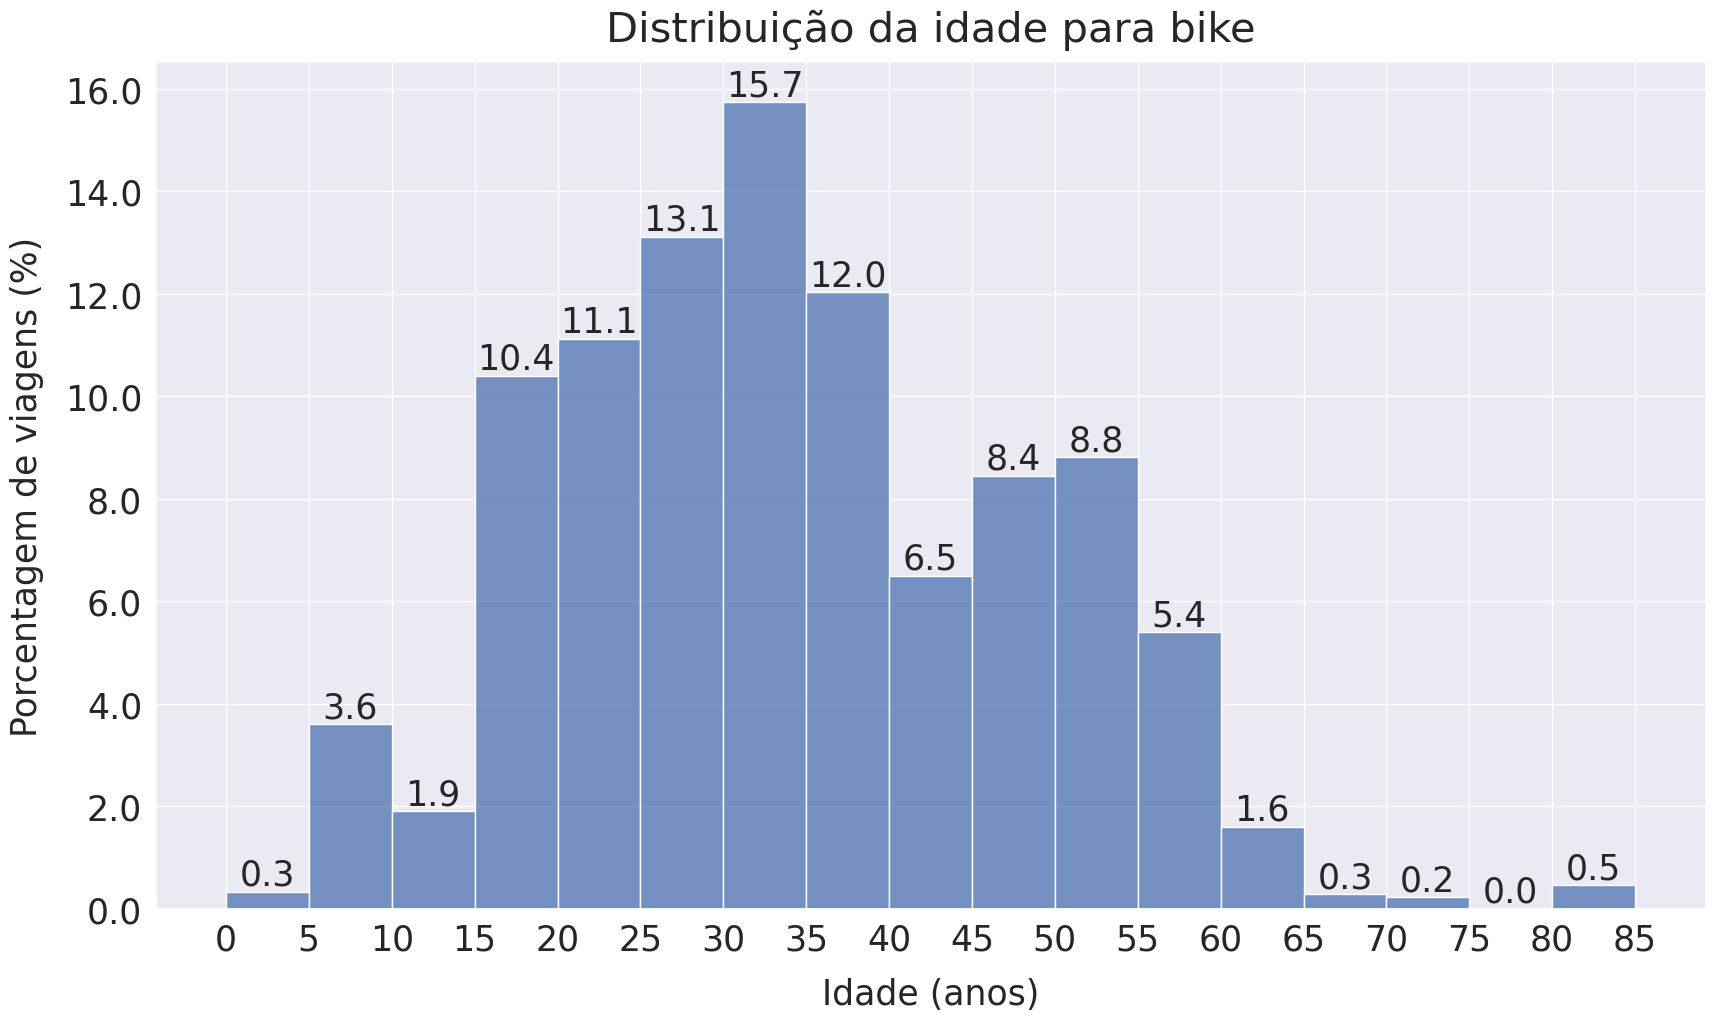

<Figure size 960x480 with 0 Axes>

In [30]:
plot_histogram_age(bike_trips, mode = 'bike') # sem expansao

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


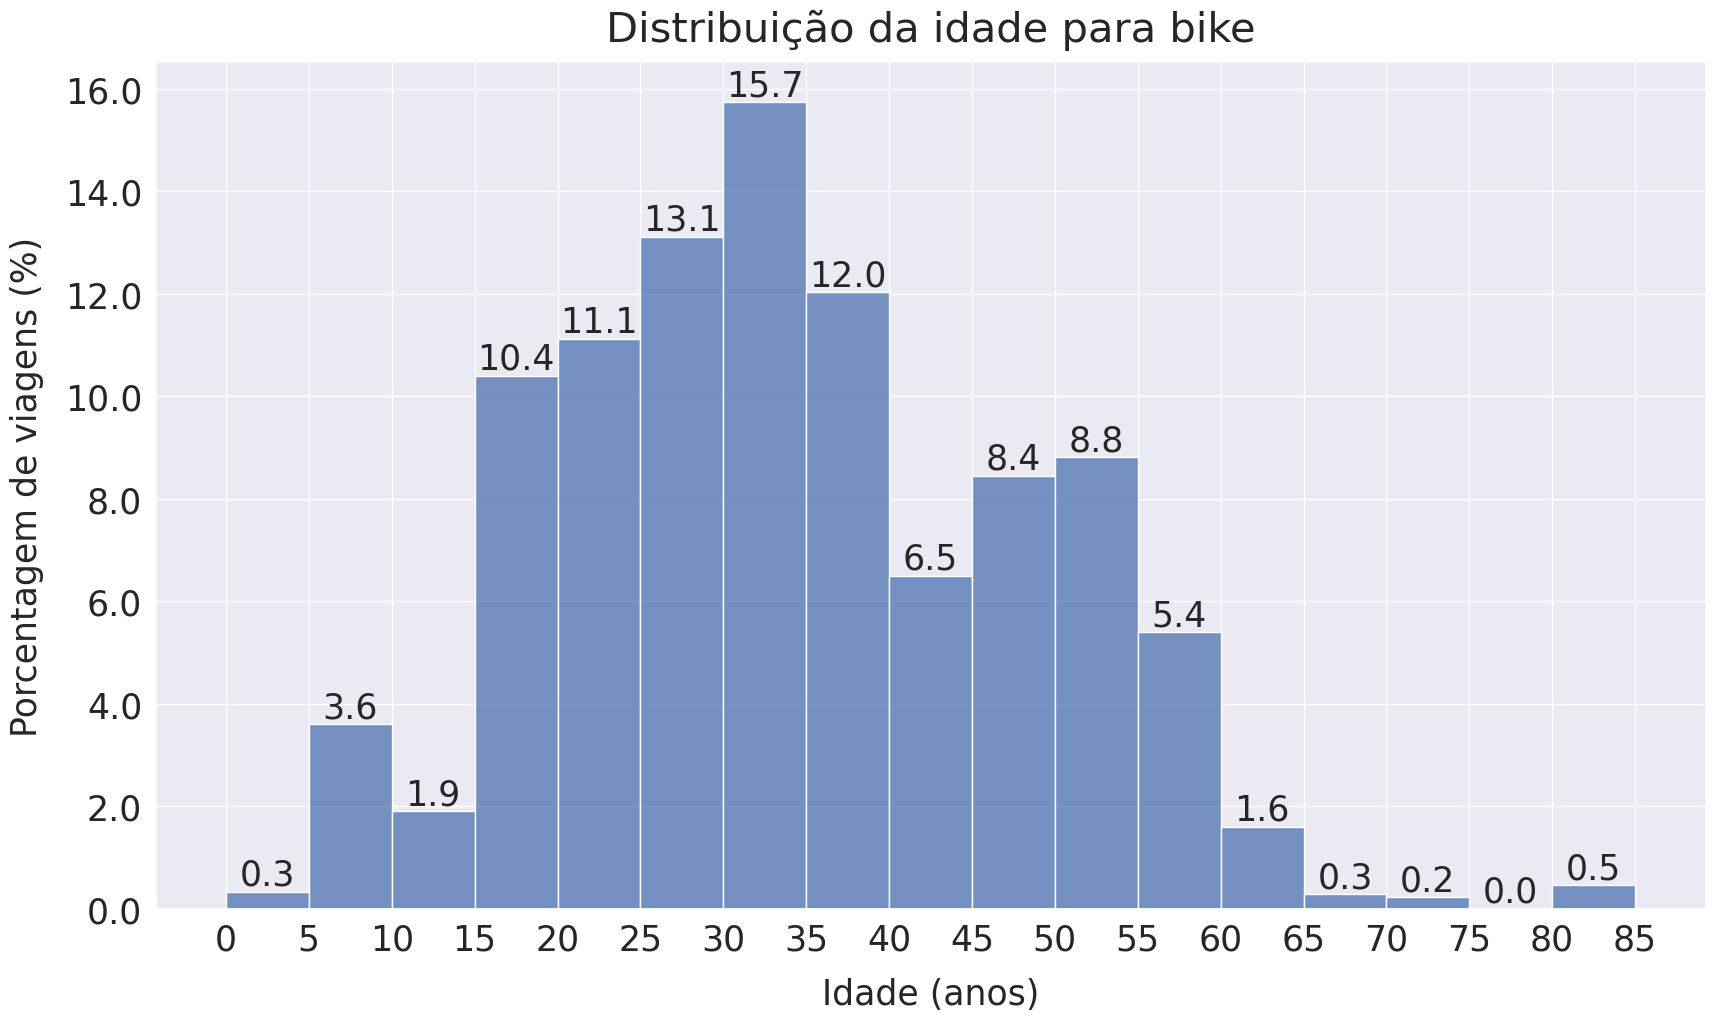

<Figure size 960x480 with 0 Axes>

In [31]:
plot_histogram_age(bike_trips, mode = 'bike') # com expansao de viagem

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


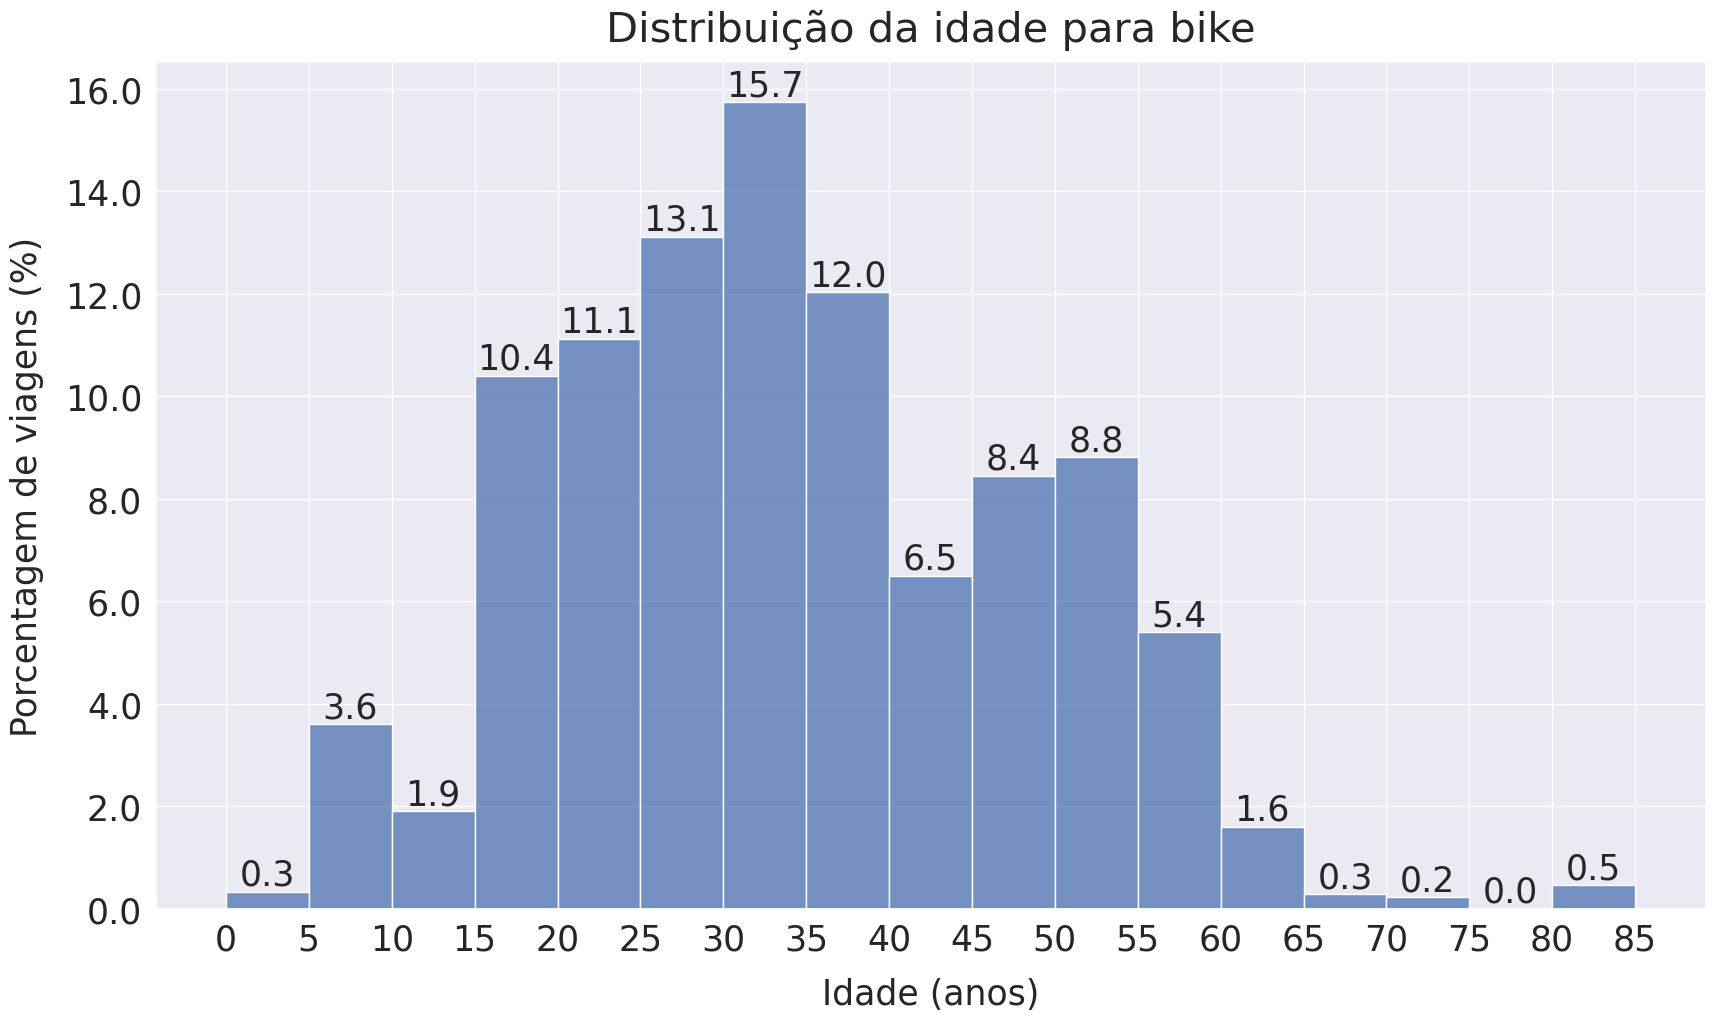

<Figure size 960x480 with 0 Axes>

In [32]:
plot_histogram_age(bike_trips, mode = 'bike') # com expansao de pessoa

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


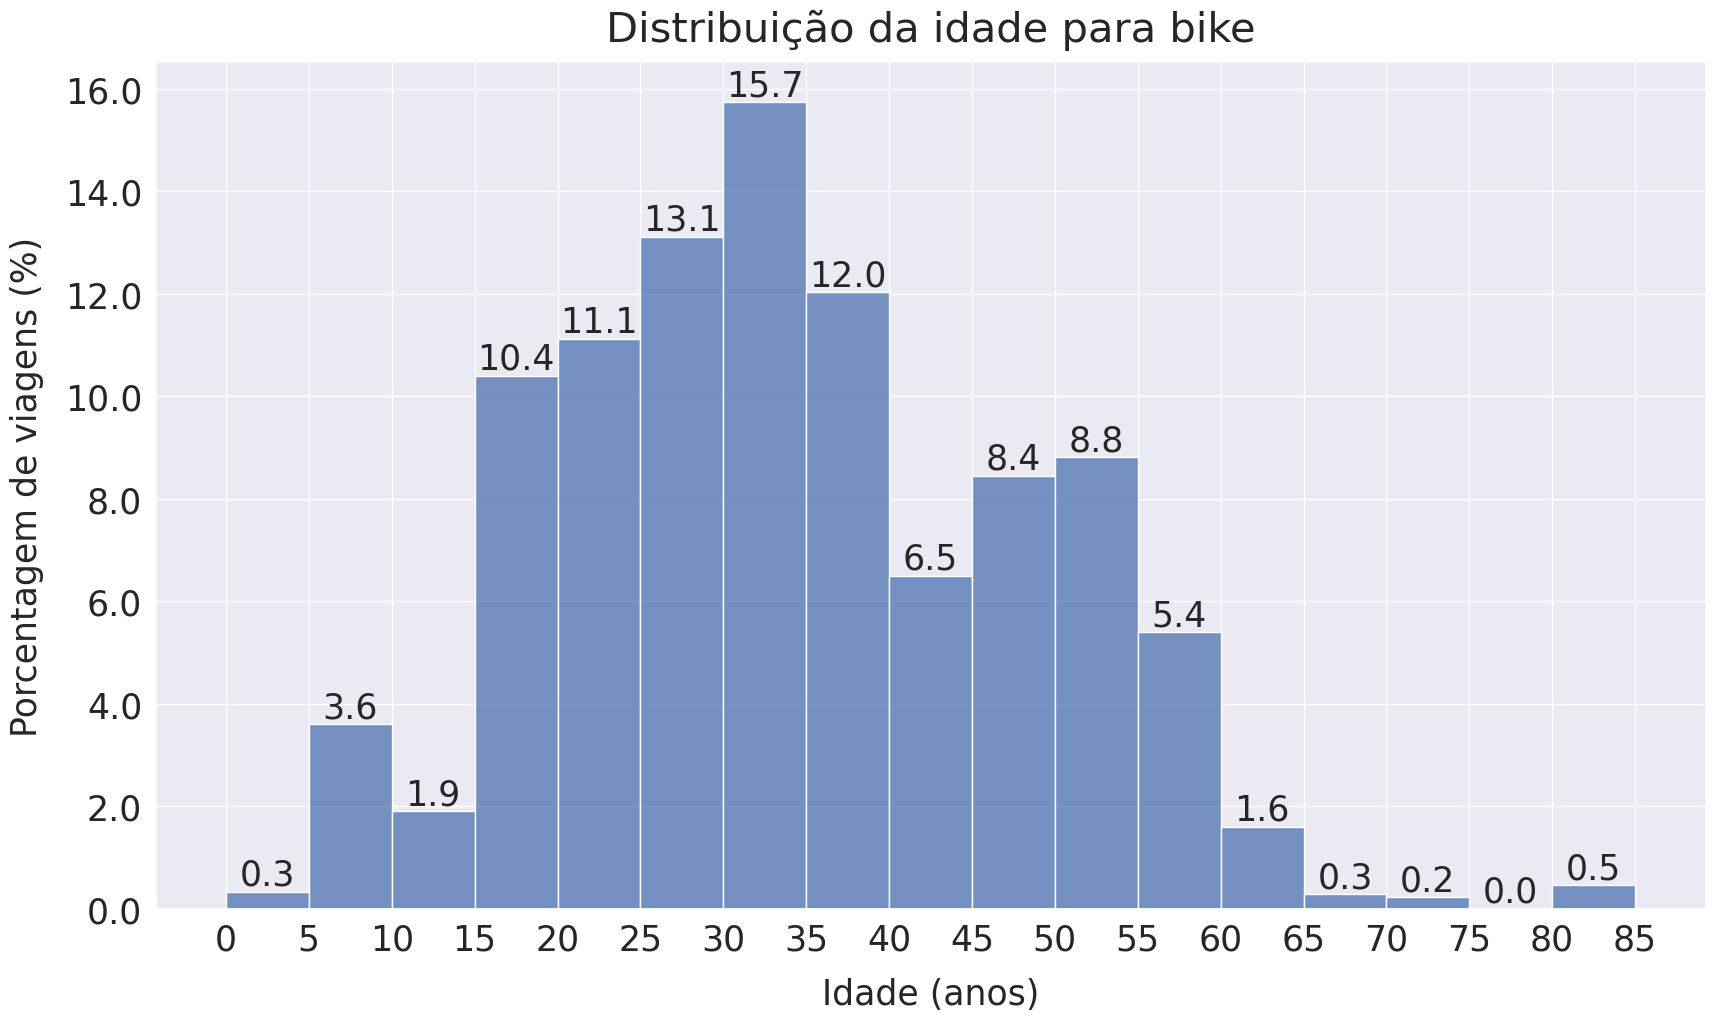

<Figure size 960x480 with 0 Axes>

In [33]:
plot_histogram_age(bike_trips, mode = 'bike')

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


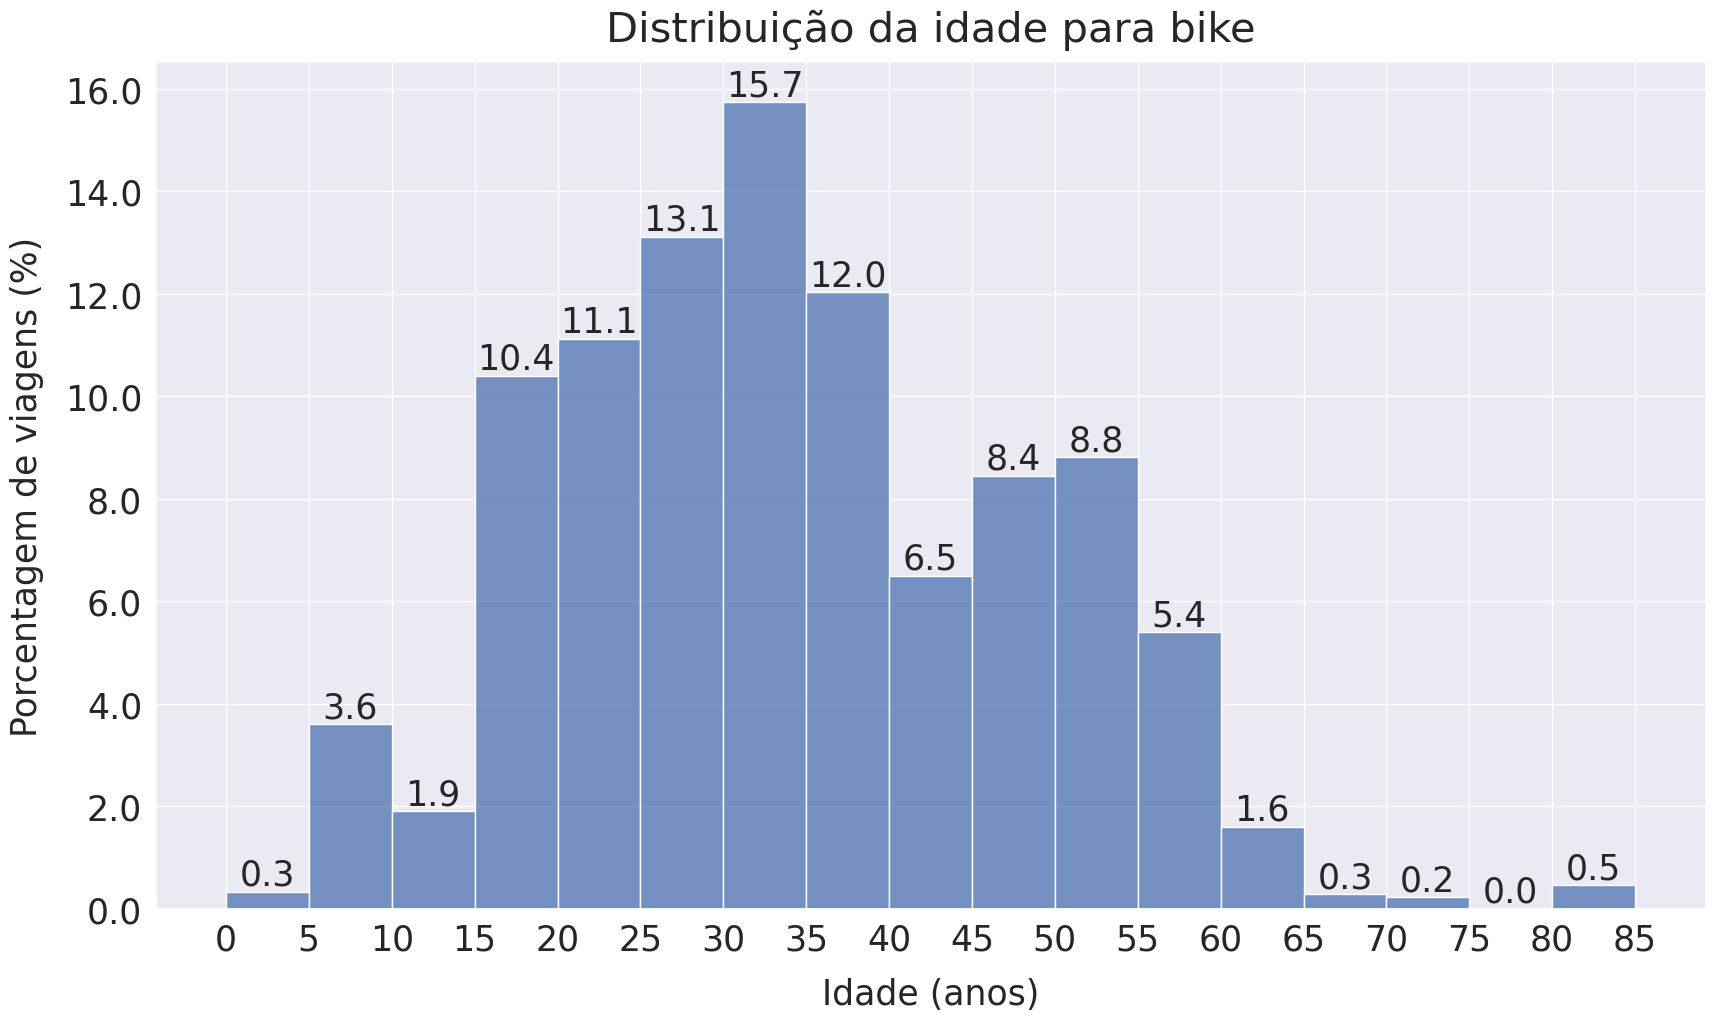

<Figure size 960x480 with 0 Axes>

In [34]:
plot_histogram_age(bike_trips, mode = 'bike')

/tmp/ipykernel_5403/4017622634.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


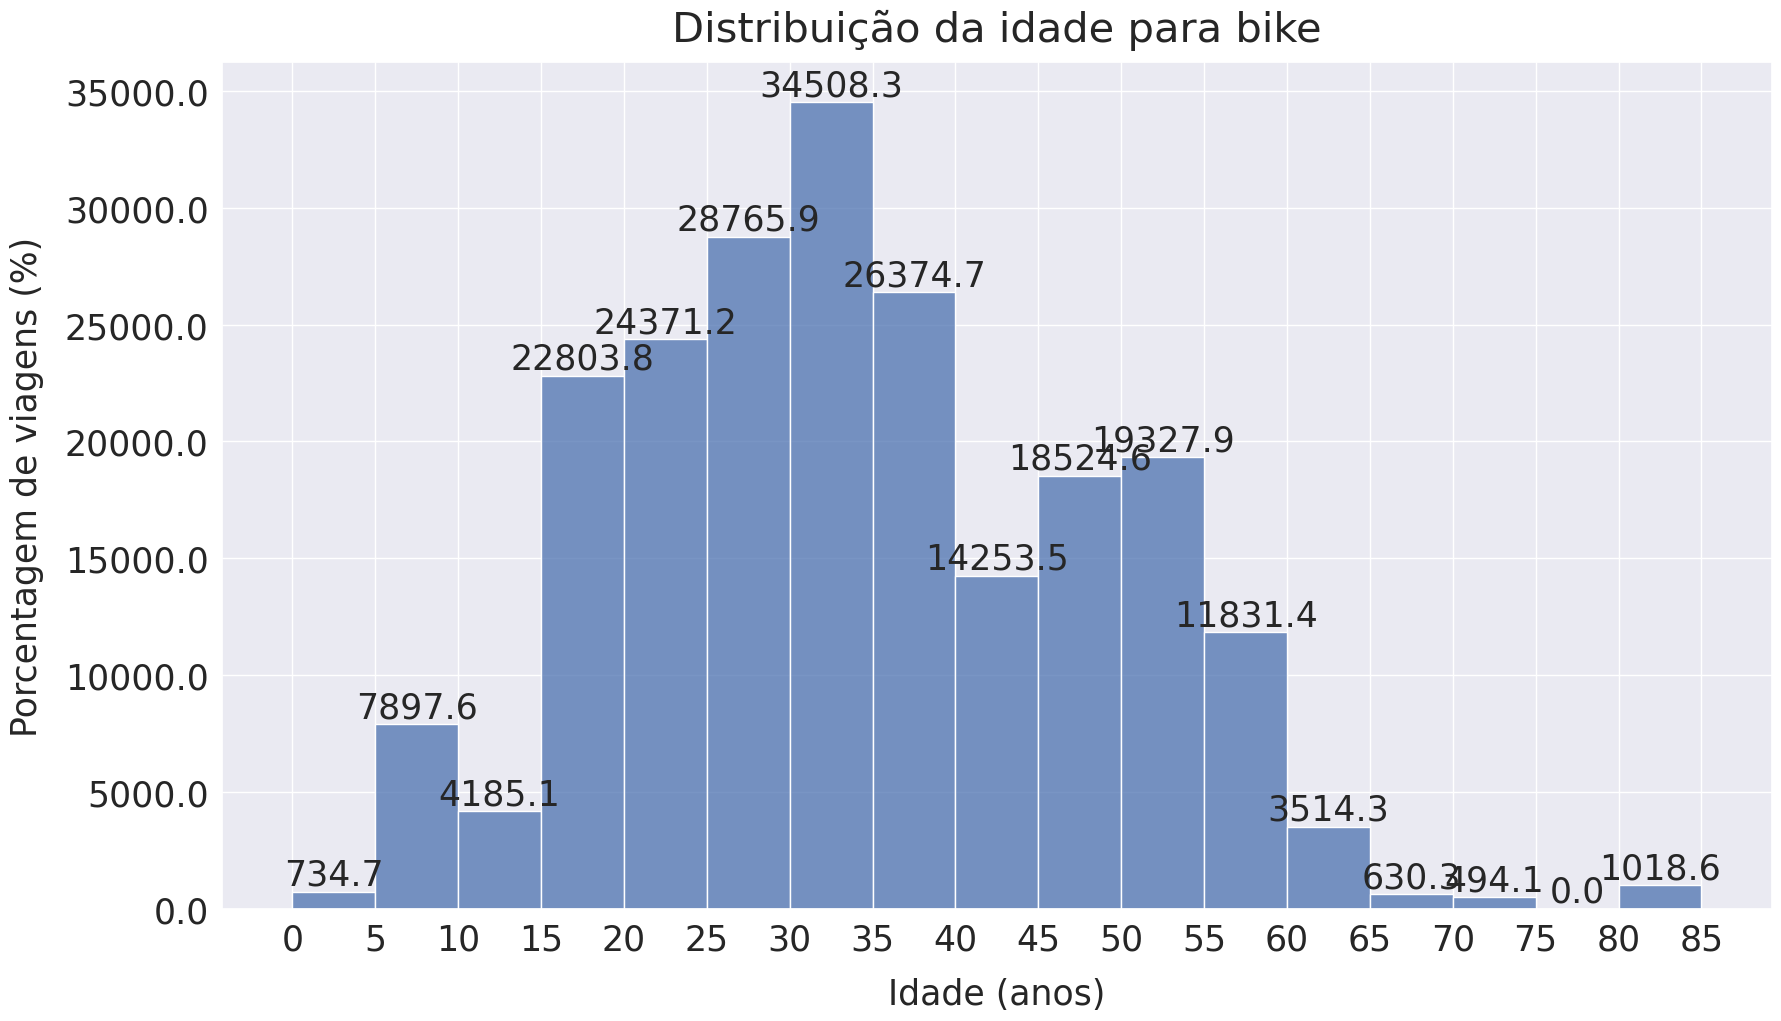

<Figure size 960x480 with 0 Axes>

In [35]:
plot_histogram_age_fe_via(bike_trips, mode = 'bike')

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


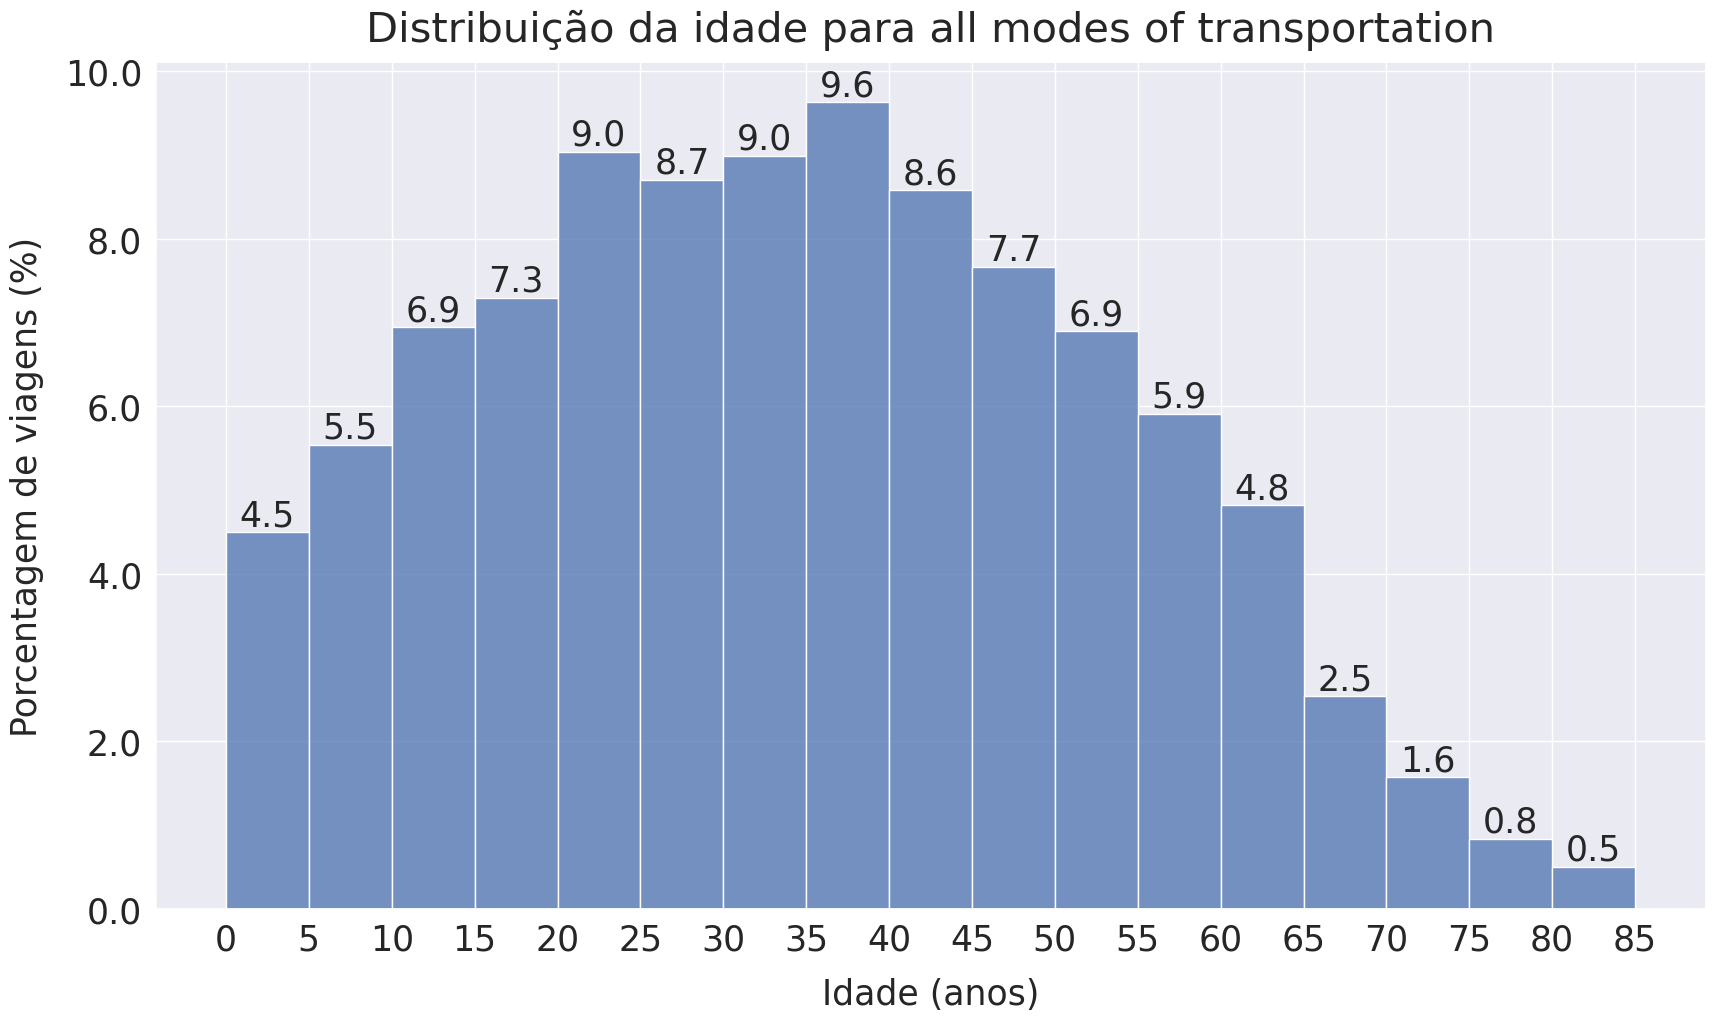

<Figure size 960x480 with 0 Axes>

In [36]:
plot_histogram_age(data_sp, mode = 'all modes of transportation')

In [37]:
public_trips = data_sp[data_sp['TIPVG'] == 1]
individual_trips = data_sp[data_sp['TIPVG'] == 2]
walk_trips = data_sp[data_sp['TIPVG'] == 3]

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


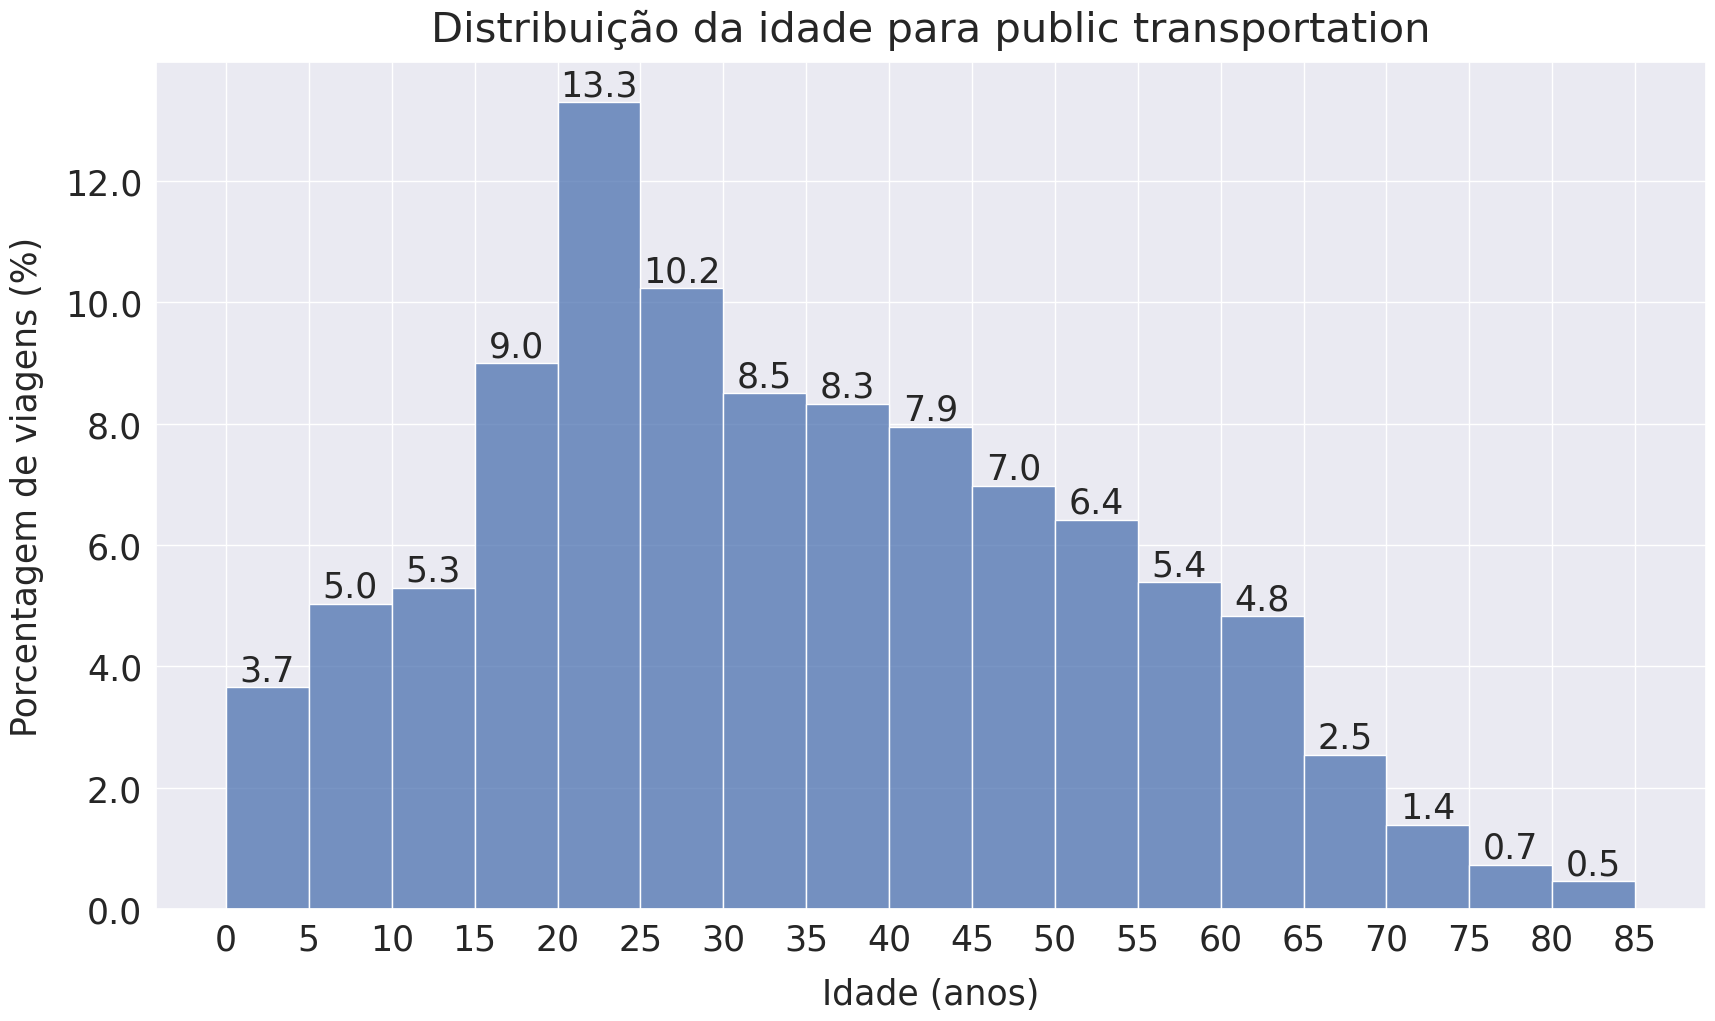

<Figure size 960x480 with 0 Axes>

In [38]:
plot_histogram_age(public_trips, mode = 'public transportation')

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


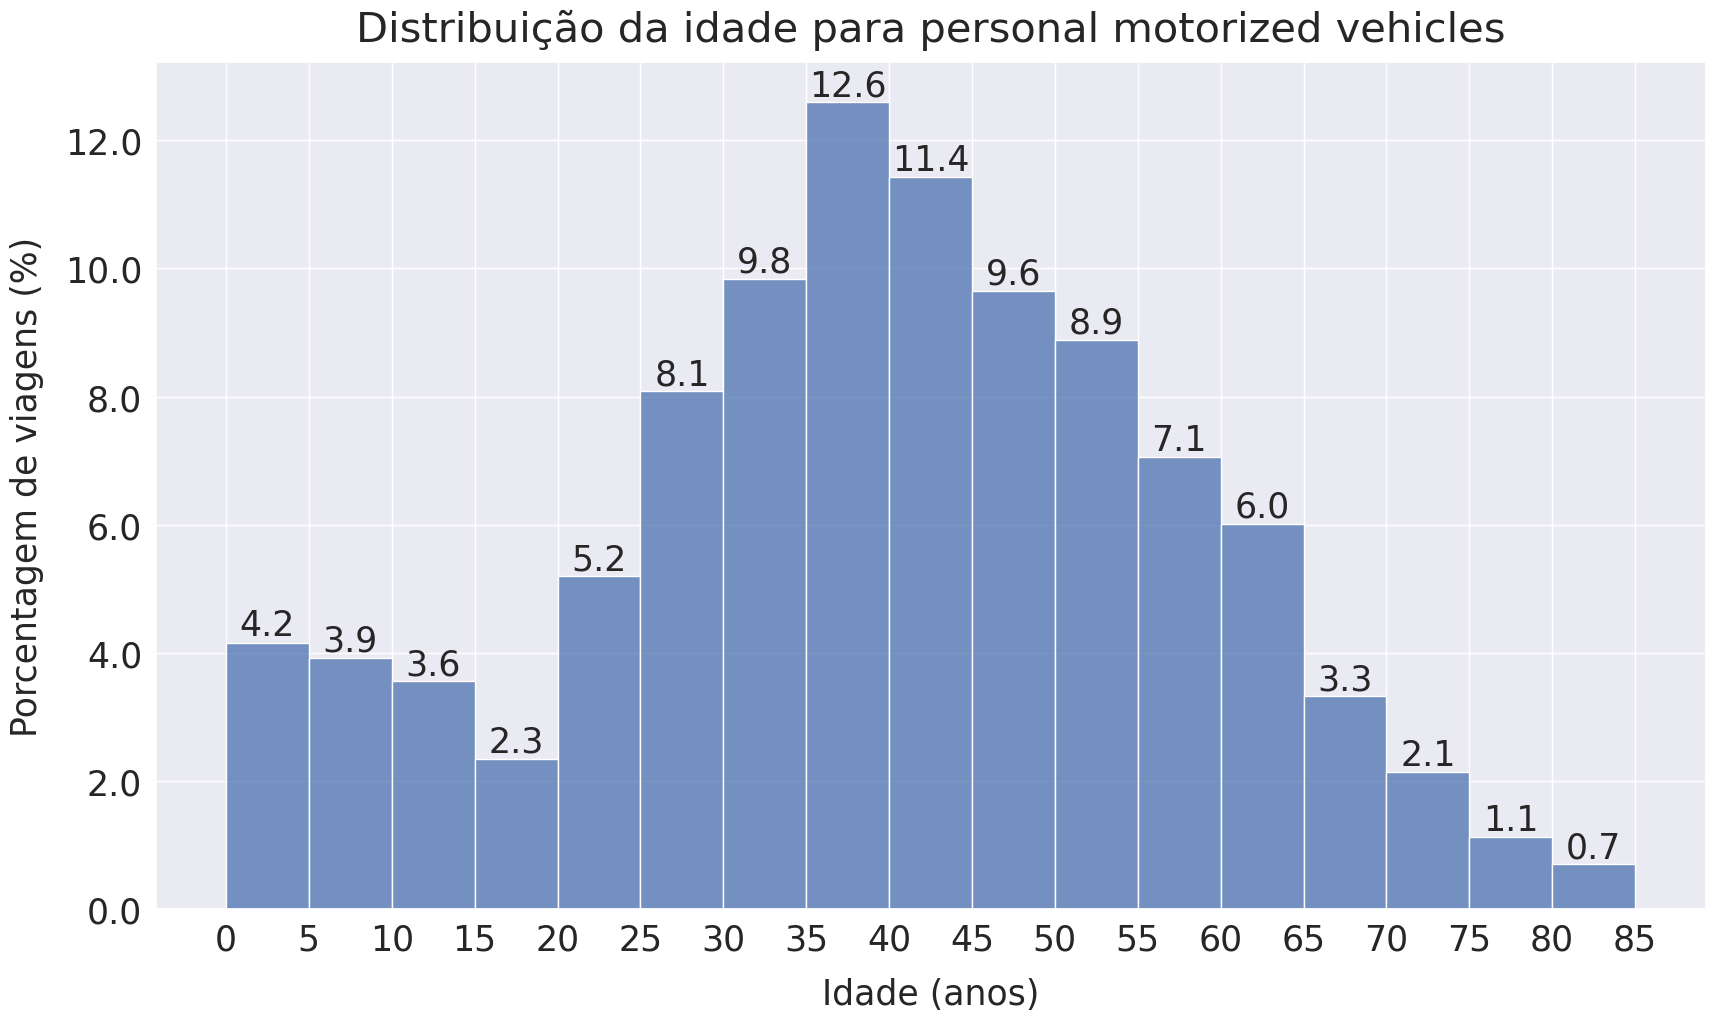

<Figure size 960x480 with 0 Axes>

In [39]:
plot_histogram_age(individual_trips, mode = 'personal motorized vehicles')

/tmp/ipykernel_5403/2213396176.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


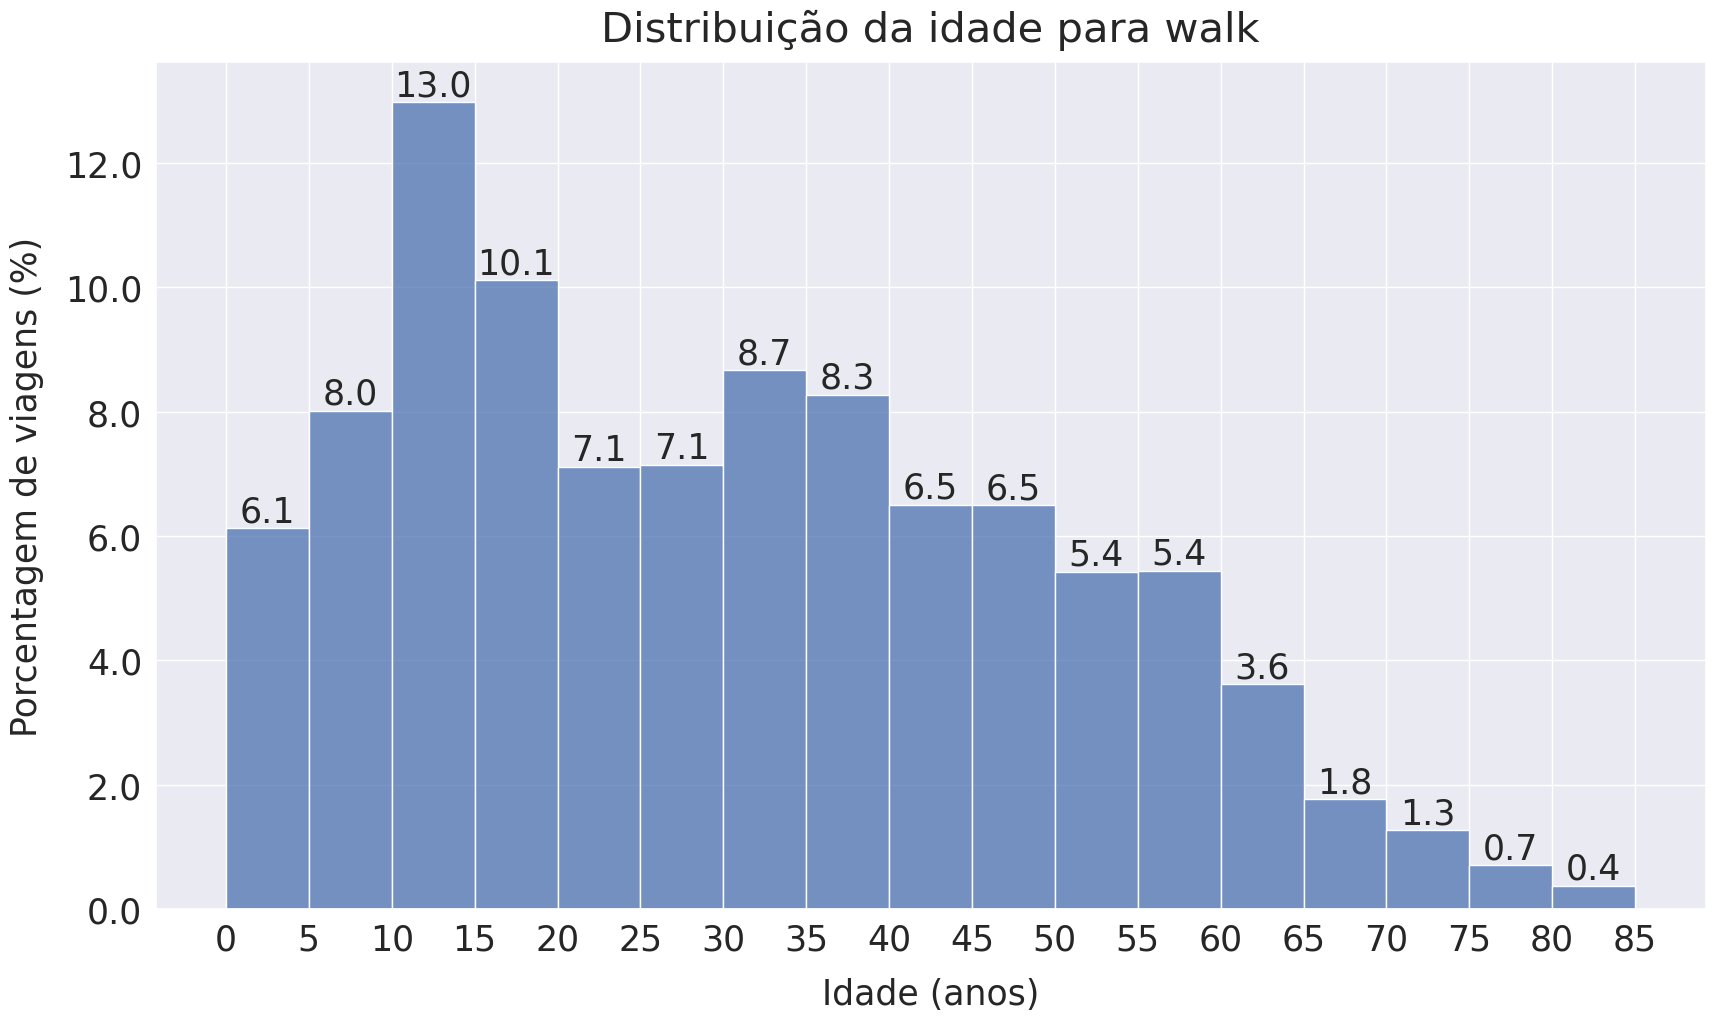

<Figure size 960x480 with 0 Axes>

In [40]:
plot_histogram_age(walk_trips, mode = 'walk')

## Social class

In [41]:
data_sp['TIPVG']

0         3.0
1         3.0
2         1.0
3         1.0
4         2.0
         ... 
183030    2.0
183069    2.0
183070    3.0
183071    3.0
183072    2.0
Name: TIPVG, Length: 118371, dtype: float64

In [42]:
def calculate_class_distribution(df):
    df_grouped  = df.groupby('CRITERIOBR')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4,5,6])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [43]:
df = calculate_class_distribution(data_sp)
df

,FE_PESS
CRITERIOBR,
A,9.281537
B1,10.666718
B2,31.328711
C1,26.691780
C2,17.294522
D-E,4.736732


In [44]:
import matplotlib.colors as mcolors
mcolors.CSS4_COLORS

{'aliceblue': '#F0F8FF',
 'antiquewhite': '#FAEBD7',
 'aqua': '#00FFFF',
 'aquamarine': '#7FFFD4',
 'azure': '#F0FFFF',
 'beige': '#F5F5DC',
 'bisque': '#FFE4C4',
 'black': '#000000',
 'blanchedalmond': '#FFEBCD',
 'blue': '#0000FF',
 'blueviolet': '#8A2BE2',
 'brown': '#A52A2A',
 'burlywood': '#DEB887',
 'cadetblue': '#5F9EA0',
 'chartreuse': '#7FFF00',
 'chocolate': '#D2691E',
 'coral': '#FF7F50',
 'cornflowerblue': '#6495ED',
 'cornsilk': '#FFF8DC',
 'crimson': '#DC143C',
 'cyan': '#00FFFF',
 'darkblue': '#00008B',
 'darkcyan': '#008B8B',
 'darkgoldenrod': '#B8860B',
 'darkgray': '#A9A9A9',
 'darkgreen': '#006400',
 'darkgrey': '#A9A9A9',
 'darkkhaki': '#BDB76B',
 'darkmagenta': '#8B008B',
 'darkolivegreen': '#556B2F',
 'darkorange': '#FF8C00',
 'darkorchid': '#9932CC',
 'darkred': '#8B0000',
 'darksalmon': '#E9967A',
 'darkseagreen': '#8FBC8F',
 'darkslateblue': '#483D8B',
 'darkslategray': '#2F4F4F',
 'darkslategrey': '#2F4F4F',
 'darkturquoise': '#00CED1',
 'darkviolet': '#9400D3

In [45]:
colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'mediumorchid', 'turquoise']
# colors = ['paleturquoise','aquamarine', 'turquoise', 'lightseagreen','mediumturquoise', 'darkturquoise']
import matplotlib.pyplot as plt


def percentage_class(data):
    df = calculate_class_distribution(data)
    plt.figure()
    ax = df['FE_PESS'].plot(kind='pie', autopct='%1.1f%%', fontsize = 20,
                            colors = colors, ylabel=None)
    ax.set_ylabel(None)
    ax.set_title('Percentage of each class for all trips', fontsize = 25)

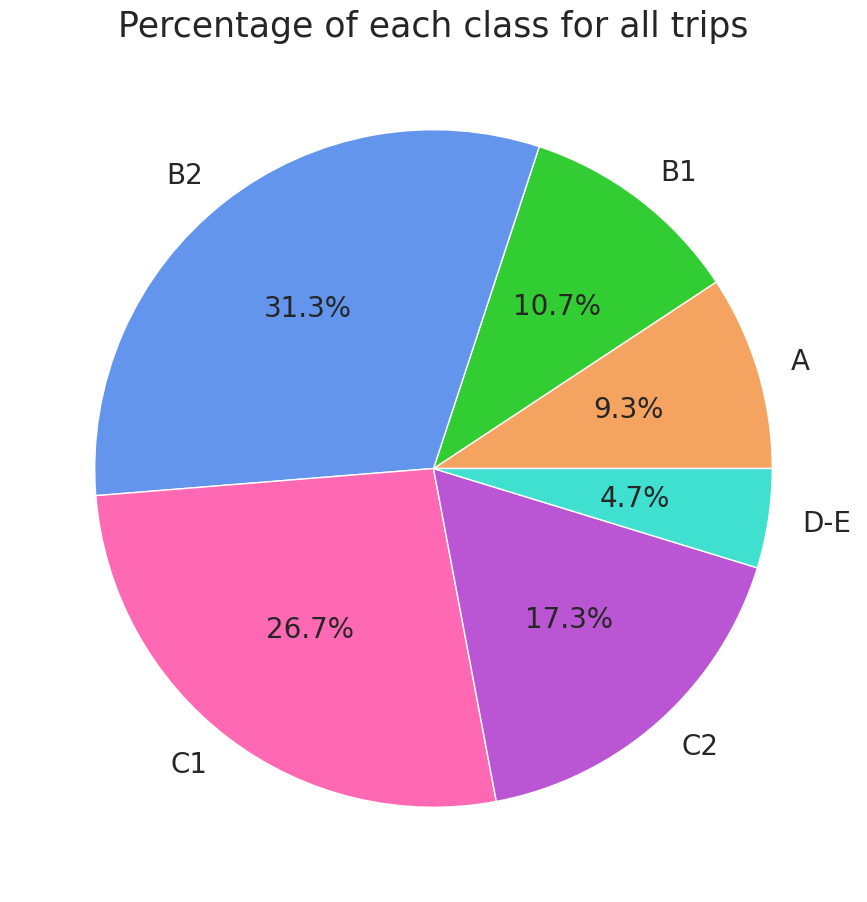

In [46]:
percentage_class(data_sp)

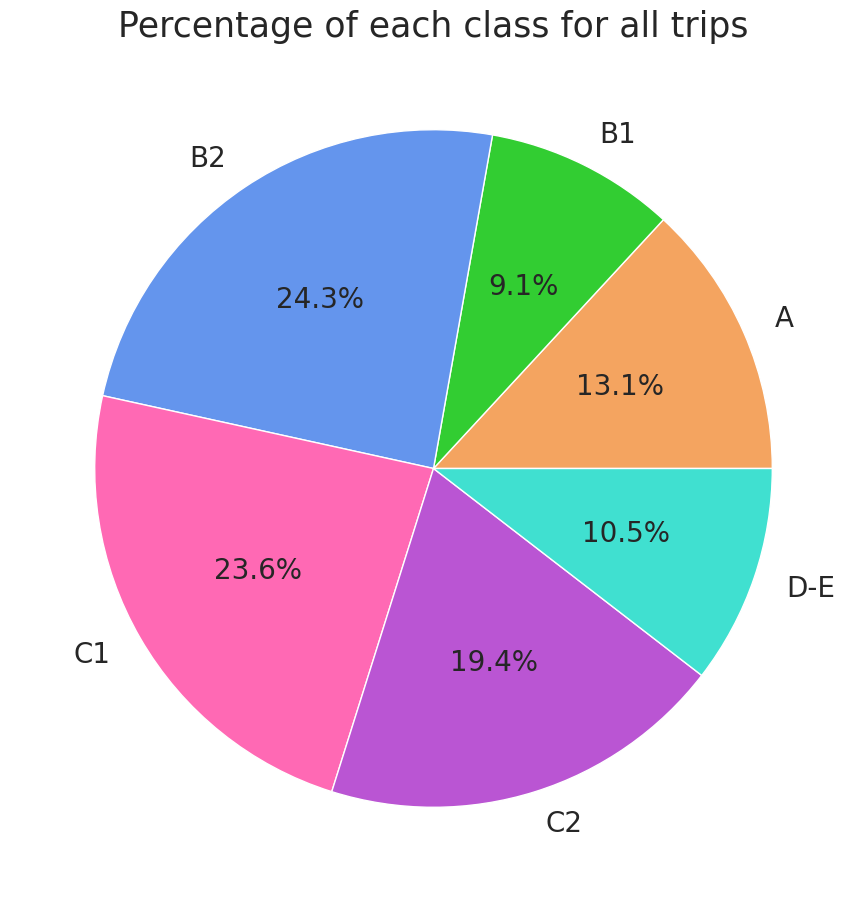

In [47]:
percentage_class(bike_trips)

In [48]:
df = calculate_class_distribution(bike_trips)
df

,FE_PESS
CRITERIOBR,
A,13.127899
B1,9.083120
B2,24.340037
C1,23.594990
C2,19.396595
D-E,10.457359


In [49]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def bike_distributionseparated_by_class(data):
    nrow=2
    ncol=3

    classes = {0: 'NA', 1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    # classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

    fig, axes = plt.subplots(nrow, ncol)

    fig.patch.set_facecolor('white')
    fig.set_size_inches(18.5, 11)
    fig.suptitle('What mode of transportation, separated by class', fontsize = 20)
    labels = ['True', 'False']
    color_dict = {'True': 'lightcoral',
            'False': 'cornflowerblue'}
    
    data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)

    count = 1

    percentages_social_class = calculate_class_distribution(data_sp)

    for r in range(nrow):
        for c in range(ncol):
            # data_class = data['TIPVG'][data['CRITERIOBR'].astype(int) == count]
            # data_plot = data_class.value_counts()
            data_class = data[data['CRITERIOBR'].astype(int) == count]
            data_plot  = data_class.groupby('TIPVG')['FE_VIA'].sum()

            colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']
                
            data_plot.plot(ax=axes[r,c], labels = None, kind='pie', autopct='%1.2f%%', fontsize = 15,
                         colors = colors)

            # data_plot.plot(ax=axes[r,c], kind='pie', autopct='%1.2f%%', fontsize = 15,
                        # colors = colors)
            
            # axes[r,c].set_title('Class ' + classes[int(count)] +
            #                     ': ' + str(round(len(data_class)*100/len(data),1)) + '%', fontsize = 15)
            
            percentage_social_class = round(float(percentages_social_class.loc[classes[int(count)]]),1)
            axes[r,c].set_title('Class ' + classes[int(count)] +
                                ': ' + str(percentage_social_class) + '%', fontsize = 15)
            
            axes[r,c].set_ylabel('Went by automobile', fontsize = 18, labelpad = 30)
            if count == 1:
                axes[r,c].legend(["Public transportation", "Personal motorized vehicles", "Walk", 'Bicycles'],loc="upper right")
            # axes[r,c].legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
            axes[r,c].set(ylabel=None)
            count+=1

In [50]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def separated_by_class(data):
    nrow=2
    ncol=3

    classes = {0: 'NA', 1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    # classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

    fig, axes = plt.subplots(nrow, ncol)

    fig.patch.set_facecolor('white')
    fig.set_size_inches(18.5, 11)
    fig.suptitle('Percentage of each mode of transportation, separated by class', fontsize = 25)
    
    data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)

    count = 1

    percentages_social_class = calculate_class_distribution(data_sp)

    for r in range(nrow):
        for c in range(ncol):
            # data_class = data['TIPVG'][data['CRITERIOBR'].astype(int) == count]
            # data_plot = data_class.value_counts()
            data_class = data[data['CRITERIOBR'].astype(int) == count]
            data_plot  = data_class.groupby('TIPVG')['FE_VIA'].sum()

            colors = ['sandybrown', 'limegreen', 'cornflowerblue','hotpink', 'darkorchid']
                
            data_plot.plot(ax=axes[r,c], labels = None, kind='pie', autopct='%1.2f%%', fontsize = 15,
                         colors = colors)

            # data_plot.plot(ax=axes[r,c], kind='pie', autopct='%1.2f%%', fontsize = 15,
                        # colors = colors)
            
            # axes[r,c].set_title('Class ' + classes[int(count)] +
            #                     ': ' + str(round(len(data_class)*100/len(data),1)) + '%', fontsize = 15)
            
            percentage_social_class = round(float(percentages_social_class.loc[classes[int(count)]]),1)
            axes[r,c].set_title('Class ' + classes[int(count)] +
                                ': ' + str(percentage_social_class) + '%', fontsize = 15)
            
            # axes[r,c].set_ylabel('Went by automobile', fontsize = 18, labelpad = 30)
            if count == 1:
                axes[r,c].legend(["Public transportation", "Personal motorized vehicles", "Walk", 'Bicycles'],loc="upper right")
            # axes[r,c].legend(loc='left center', bbox_to_anchor=(-0.1, 1.),fontsize=8)
            axes[r,c].set(ylabel=None)
            count+=1

In [51]:
index_map = {1: 'Coletivo', 2: 'Individual', 3: 'A pé', 4: 'Bicicleta'}

In [52]:
data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)
data_class = data['TIPVG'][data['CRITERIOBR'].astype(int) == 1]
data_class.value_counts()

2.0    15952
3.0     4438
1.0     3936
4.0      209
Name: TIPVG, dtype: int64

In [53]:
data_class = data[data['CRITERIOBR'].astype(int) == 1]
df_grouped  = data_class.groupby('TIPVG')['FE_VIA'].sum()
df_percentage = df_grouped / df_grouped.sum() * 100
df_percentage

TIPVG
1.0    18.453370
2.0    62.458596
3.0    18.034140
4.0     1.053895
Name: FE_VIA, dtype: float64

In [54]:
index_map = {1: 'Coletivo', 2: 'Individual', 3: 'A pé', 4: 'Bicicleta'}

In [55]:
len(data_sp)

118371

In [56]:
data_sp

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
0,1,36,333743,7394463,10001,1,15.416667,1,1,6092017,1,1,1,2,1,100011,1,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,1,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.132647,3.0,2,1.0,36.0,333743.0,7394463.0,3.0,36.0,333104.0,7394476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,5.0,45.0,NaN,5.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,1
1,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,0,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.132647,3.0,2,3.0,36.0,333104.0,7394476.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,15.0,45.0,NaN,15.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,2
2,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,1,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.882487,3.0,3,1.0,36.0,333743.0,7394463.0,82.0,36.0,327503.0,7392159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,9.0,0.0,10.0,9.0,50.0,20.0,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,6651.77,3
3,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.882487,3.0,3,82.0,36.0,327503.0,7392159.0,84.0,36.0,329431.0,7395939.0,93.0,36.0,329861.0,7397268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,2.0,1.0,4.0,NaN,NaN,17.0,0.0,20.0,18.0,0.0,1.0,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4243.30,4
4,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.882487,3.0,3,84.0,36.0,329431.0,7395939.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,2.0,2.0,12.0,NaN,NaN,NaN,22.0,50.0,1.0,23.0,30.0,1.0,40.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4557.62,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

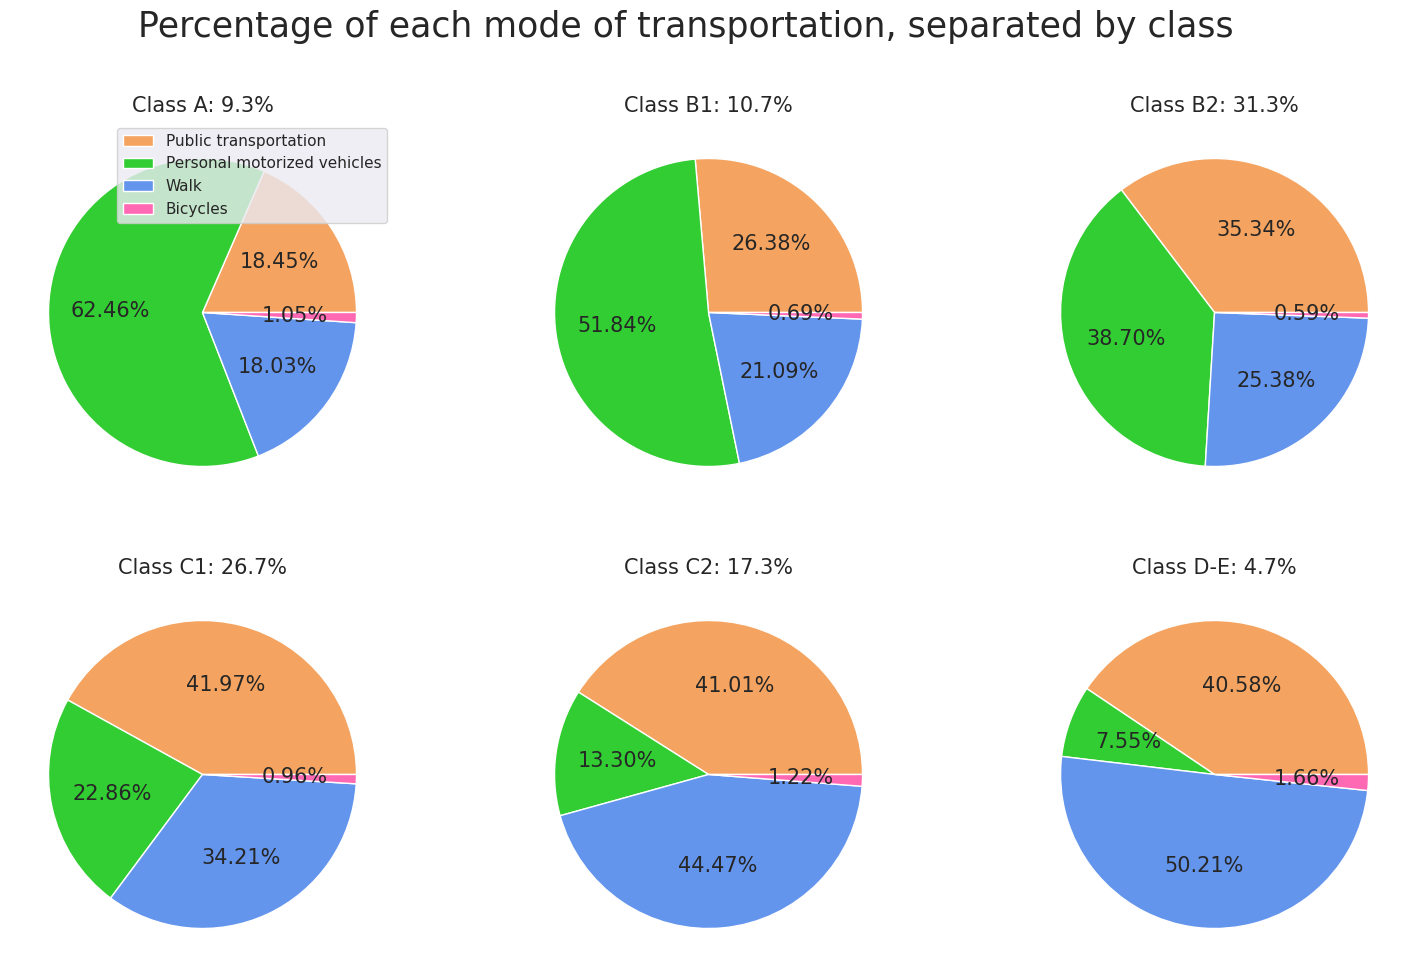

In [57]:
separated_by_class(data)

/tmp/ipykernel_5403/849969570.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)


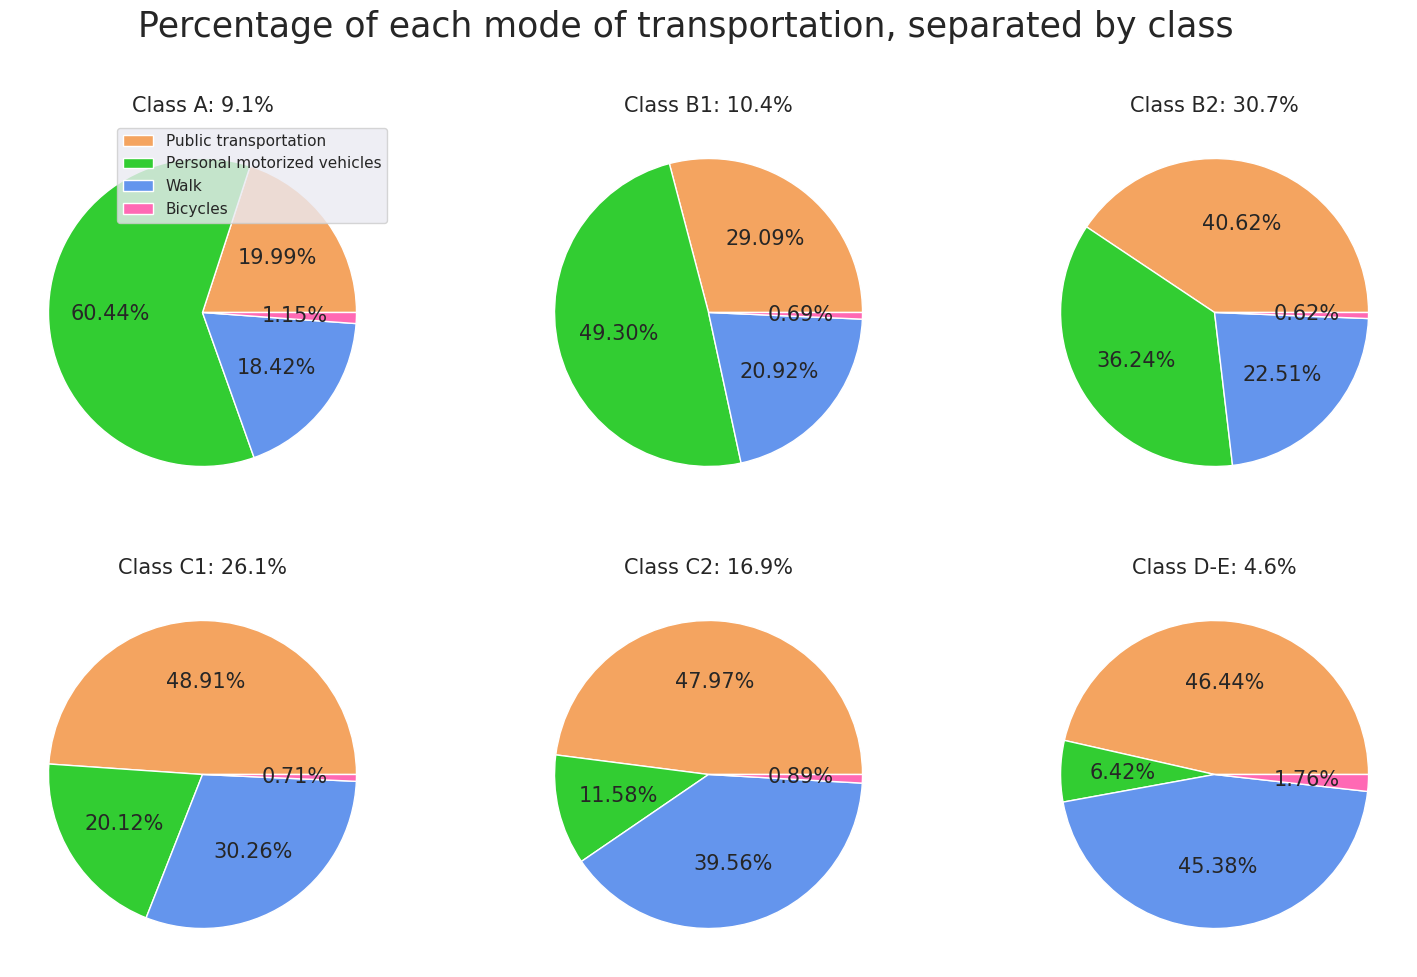

In [58]:
separated_by_class(data_sp)

In [59]:
# viagens longas de bike
# falar que nao vai usar fator de expansao pq sao poucas viagens de bike - um account for many

In [60]:
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [61]:
# classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

# df = bike_trips

# duration = pd.DataFrame({})

# df['CRITERIOBR'] = df['CRITERIOBR'].fillna(0)

# for count in classes.keys():
#     data_class = df[df['CRITERIOBR'].astype(int) == count]
#     print(classes[count])
#     # print(data_class['DURACAO'].quantile([0.25, 0.5, 0.75]))
#     print(data_class['DURACAO'])
#     duration[classes[count]] = data_class['DURACAO'].values
#     print('a')
#     print(duration[classes[count]])
#     # print(data_class['DURACAO'].mean())
#     # print(data_class['DURACAO'].max())
#     # data_plot = data_class.value_counts()
#     # print(data_plot)
# duration

<AxesSubplot:>

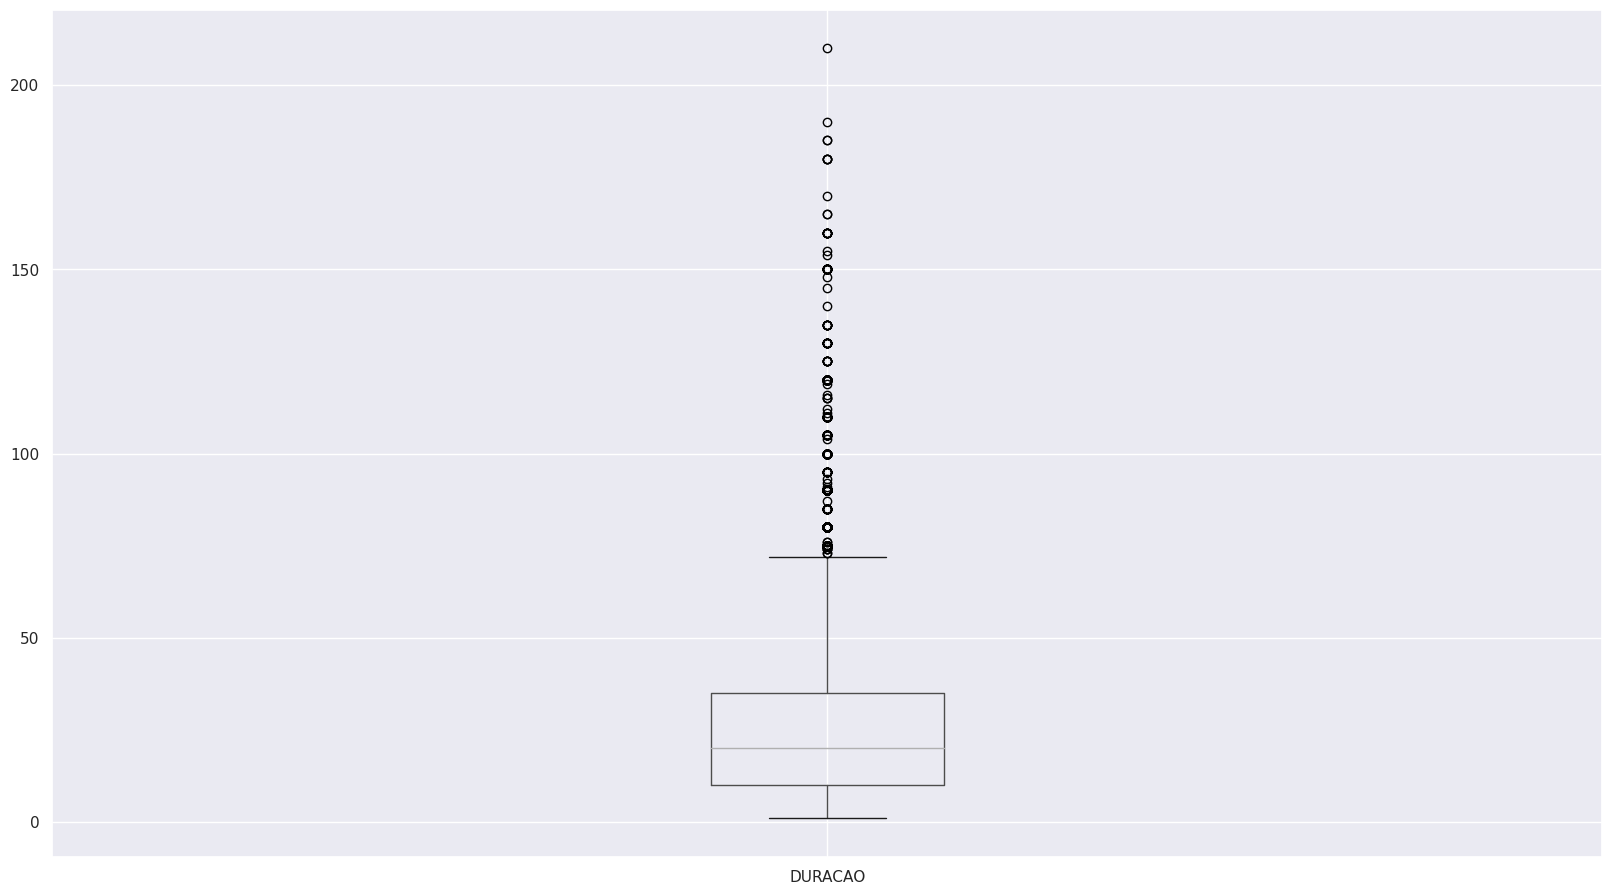

In [62]:
data_class.boxplot(column=['DURACAO'])

In [63]:
#define number of rows and columns for subplots
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def duration_separated_by_class(data):
    nrow=2
    ncol=3

    classes = {0: 'NA', 1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    # classes = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}

    fig, axes = plt.subplots(nrow, ncol)

    fig.patch.set_facecolor('white')
    fig.set_size_inches(18.5, 11)
    # fig.suptitle('Duration of all trips, separated by class', fontsize = 25)
    fig.suptitle('Duration of bicycle trips, separated by class', fontsize = 25)
    
    data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)

    data = data.rename(columns={"DURACAO": "Duration"})

    count = 1

    percentages_social_class = calculate_class_distribution(data)

    for r in range(nrow):
        for c in range(ncol):

            data_class = data[data['CRITERIOBR'].astype(int) == count]
            print(data_class)
            data_class.boxplot(ax=axes[r,c],column=['Duration'], fontsize=18)
            
            percentage_social_class = round(float(percentages_social_class.loc[classes[int(count)]]),1)
            axes[r,c].set_title('Class ' + classes[int(count)] +
                                ': ' + str(percentage_social_class) + '%', fontsize = 20)
            axes[r,c].set(ylabel=None)
            # axes[r,c].set(xlabel='Duration')
            # axes[r,c].set_ylim(0,240)
            axes[r,c].set_ylim(0,120)
            count+=1

In [64]:
len(bike_trips)

963

In [65]:
len(data_sp)

118371

/tmp/ipykernel_5403/663826876.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)


        ZONA  MUNI_DOM  CO_DOM_X  CO_DOM_Y   ID_DOM  F_DOM      FE_DOM   DOM  \
8092      27        36    331919   7393007   270338      0  154.217391   338   
8093      27        36    331919   7393007   270338      0  154.217391   338   
8094      27        36    331919   7393007   270338      0  154.217391   338   
8394      27        36    332213   7393149   271669      0   48.105882  1669   
8395      27        36    332213   7393149   271669      0   48.105882  1669   
...      ...       ...       ...       ...      ...    ...         ...   ...   
125161   340        36    325360   7393345  3401113      0   20.109756  1113   
125162   340        36    325360   7393345  3401113      0   20.109756  1113   
125163   340        36    325360   7393345  3401113      0   20.109756  1113   
125167   340        36    325360   7393345  3401113      0   20.109756  1113   
125168   340        36    325360   7393345  3401113      0   20.109756  1113   

        CD_ENTRE      DATA  TIPO_DOM  A

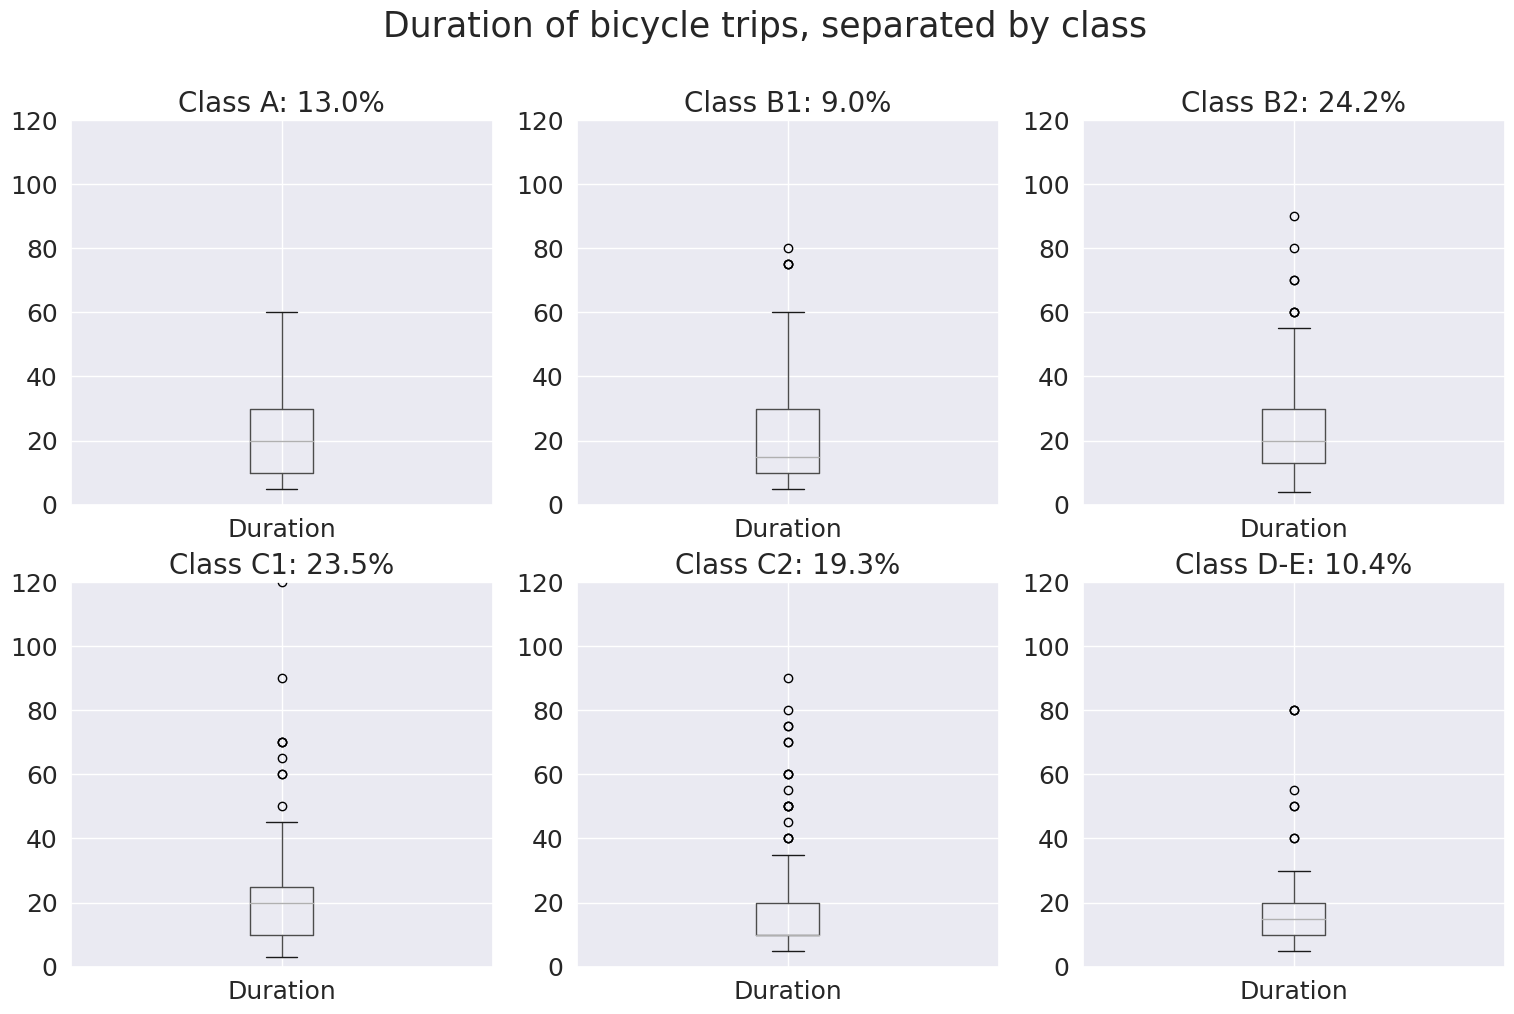

In [66]:
duration_separated_by_class(bike_trips)

/tmp/ipykernel_5403/663826876.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CRITERIOBR'] = data['CRITERIOBR'].fillna(0)


        ZONA  MUNI_DOM  CO_DOM_X  CO_DOM_Y   ID_DOM  F_DOM      FE_DOM   DOM  \
43         1        36    333745   7394553    10015      1   15.416667    15   
44         1        36    333745   7394553    10015      0   15.416667    15   
67         1        36    333847   7394431    10022      1   15.416667    22   
68         1        36    333847   7394431    10022      0   15.416667    22   
213        1        36    333510   7394390    10680      1   30.038462   680   
...      ...       ...       ...       ...      ...    ...         ...   ...   
182793   516        31    311314   7403219  5164580      0  291.658537  4580   
183069   517        25    295319   7411011  5171409      0   52.500000  1409   
183070   517        25    295319   7411011  5171409      0   52.500000  1409   
183071   517        25    295319   7411011  5171409      0   52.500000  1409   
183072   517        25    295319   7411011  5171409      0   52.500000  1409   

        CD_ENTRE      DATA  TIPO_DOM  A

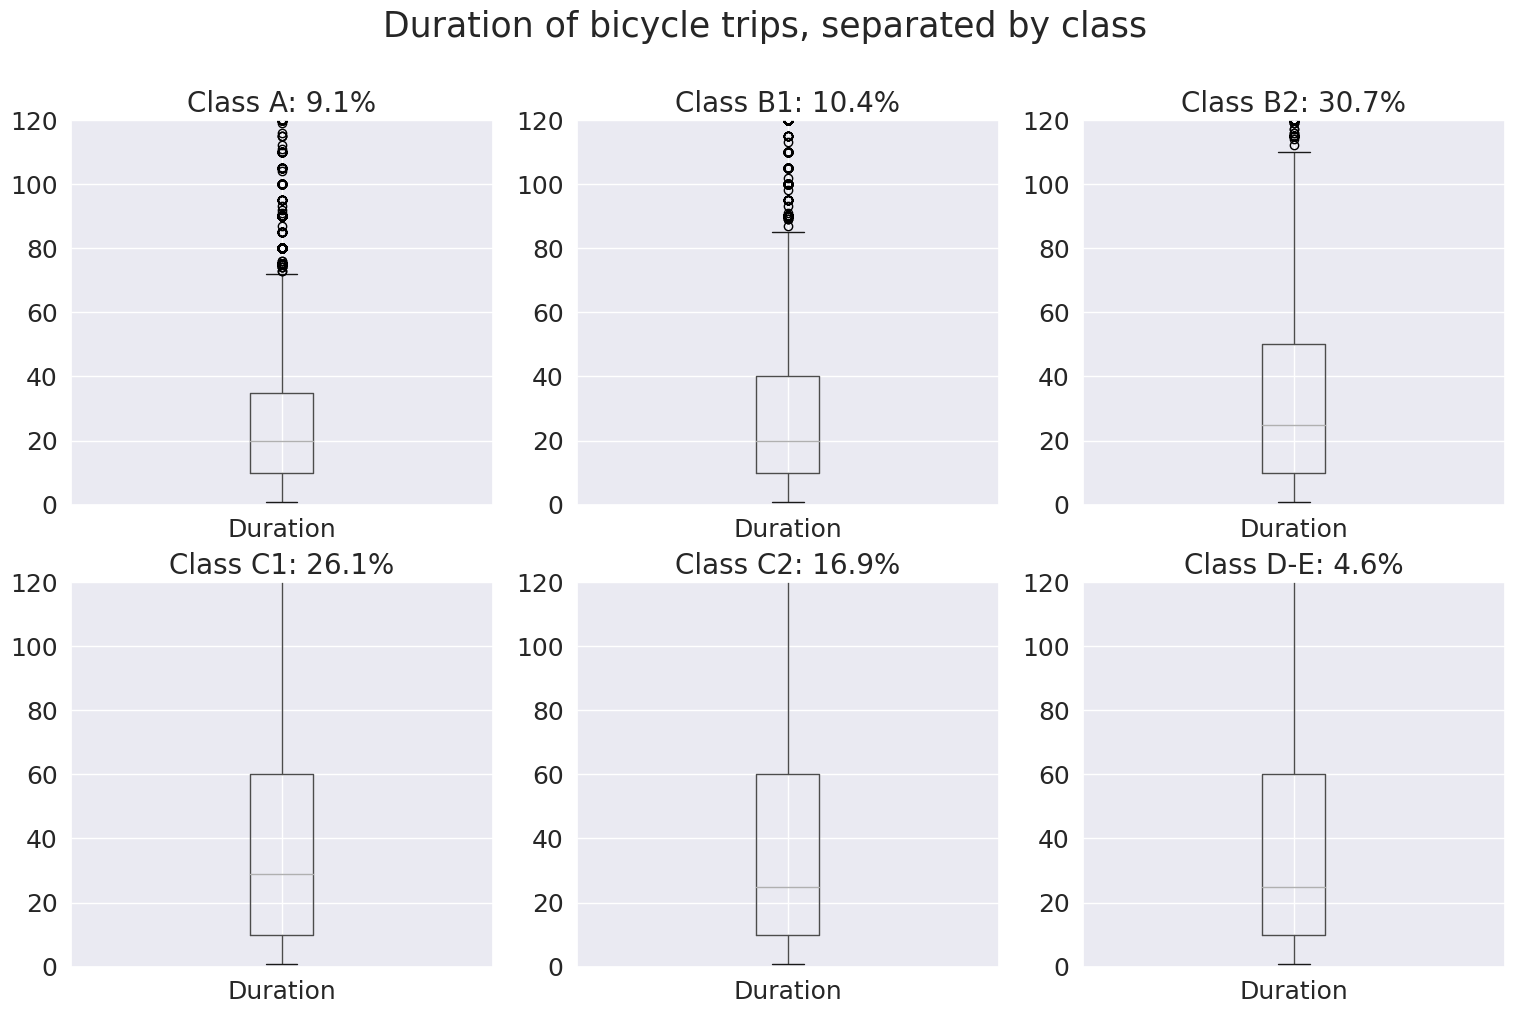

In [67]:
duration_separated_by_class(data_sp)

In [68]:
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [69]:
bike_trips['DURACAO'].mean()

21.246105919003114

In [70]:
len(data_sp[data_sp['QT_BICICLE'] > 1])/len(data_sp)

0.14169010990867695

In [71]:
len(data_sp[data_sp['QT_BICICLE'] >= 1])/len(data_sp)

0.3736219175304762

In [72]:
data_sp['HAS_BIKE'] = data_sp['QT_BICICLE'] >= 1

/tmp/ipykernel_5403/2513035500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sp['HAS_BIKE'] = data_sp['QT_BICICLE'] >= 1


In [73]:
len(data_sp[data_sp['HAS_BIKE']])/len(data_sp)

0.3736219175304762

In [74]:
def calculate_bike_distribution(df):
    df_grouped  = df.groupby('QT_BICICLE')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    # index_map = {1: 'Masculino', 2: 'Feminino'}
    # df_percentage = df_percentage[df_percentage.index.isin([1,2])]
    # df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [75]:
df = calculate_bike_distribution(data_sp)
df

,FE_PESS
QT_BICICLE,
0.0,65.466441
1.0,22.883051
2.0,8.100304
3.0,2.375034
4.0,0.872113
5.0,0.197367
6.0,0.089611
7.0,0.001637
8.0,0.009223


<AxesSubplot:xlabel='QT_BICICLE'>

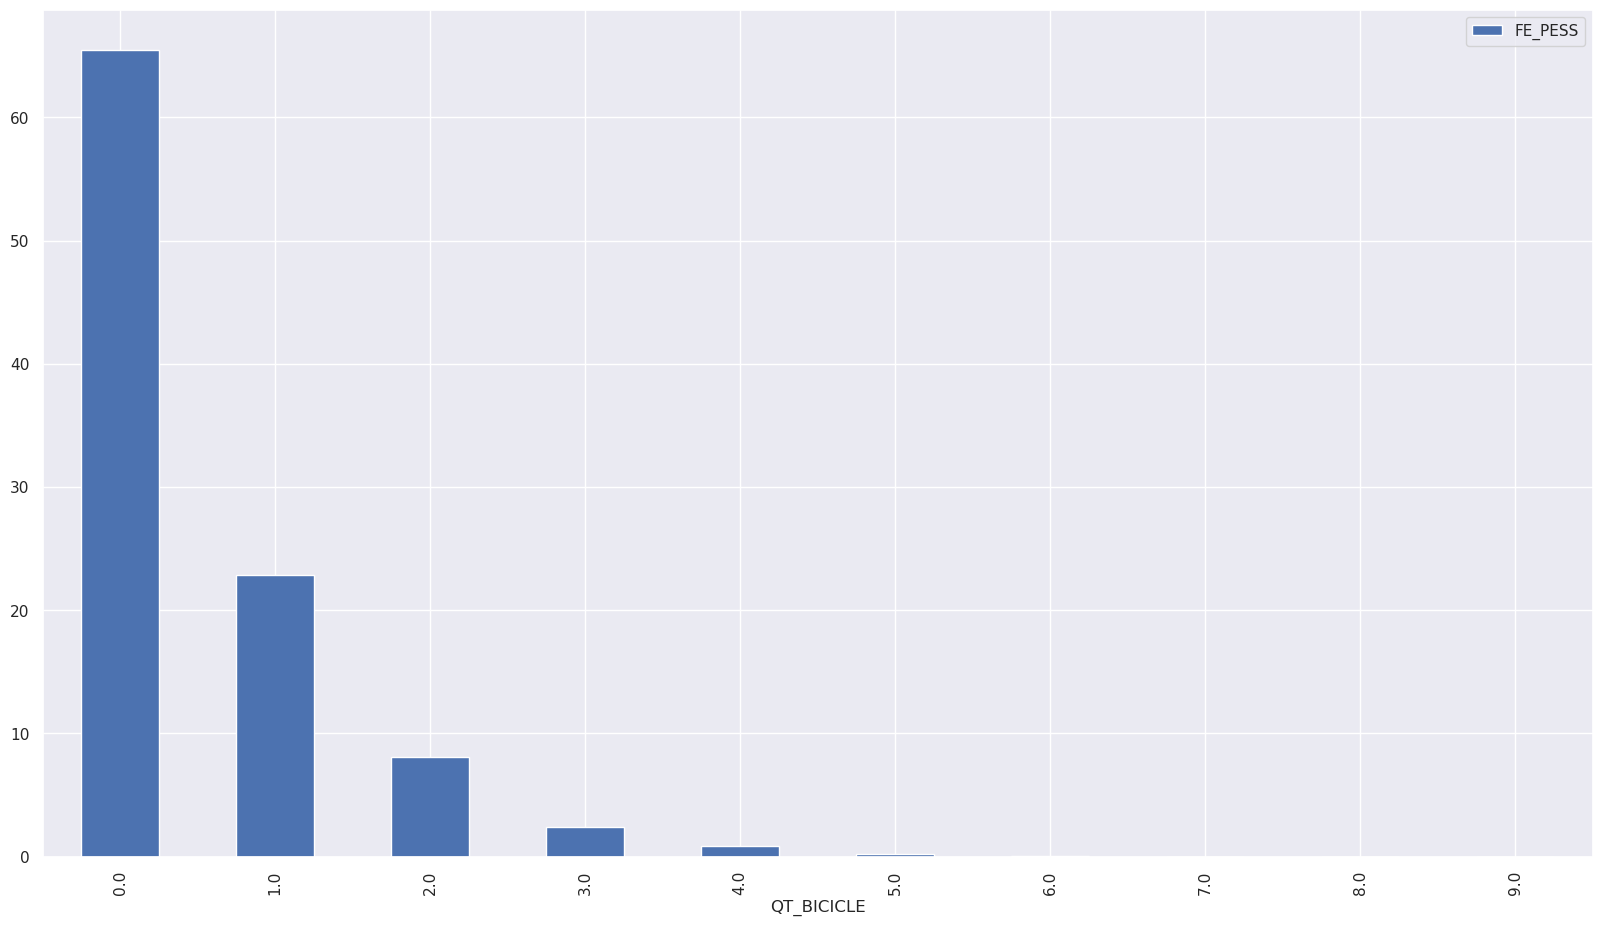

In [76]:
df.plot(kind='bar')

In [77]:
calculate_bike_distribution(data_sp)

,FE_PESS
QT_BICICLE,
0.0,65.466441
1.0,22.883051
2.0,8.100304
3.0,2.375034
4.0,0.872113
5.0,0.197367
6.0,0.089611
7.0,0.001637
8.0,0.009223


In [78]:
100 - 66.593744

33.406256

In [79]:
# 1/3 dos domiciclios tem bicicleta, mas menos de um por cento das viagens é feita de bicicleta

In [80]:
def calculate_class_distribution(df):
    df_grouped  = df.groupby('CRITERIOBR')['FE_PESS'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4,5,6])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [81]:
df = calculate_class_distribution(data_sp)
df

,FE_PESS
CRITERIOBR,
A,9.082614
B1,10.438107
B2,30.657268
C1,26.119716
C2,16.923862
D-E,4.635213


In [82]:
data_sp['CRITERIOBR'].value_counts(normalize=True).sort_index()*100

0.0     2.381495
1.0    18.838229
2.0    14.769665
3.0    28.696218
4.0    19.467606
5.0    12.240329
6.0     3.606458
Name: CRITERIOBR, dtype: float64

In [83]:
calculate_class_distribution(bike_trips)

,FE_PESS
CRITERIOBR,
A,13.048801
B1,9.028392
B2,24.193384
C1,23.452826
C2,19.279727
D-E,10.394351


In [84]:
bike_trips['CRITERIOBR'].value_counts(normalize=True).sort_index()*100

0.0     1.142264
1.0    20.664590
2.0    13.395639
3.0    23.779855
4.0    18.068536
5.0    16.926272
6.0     6.022845
Name: CRITERIOBR, dtype: float64

In [85]:
df = calculate_class_distribution(data_sp)
df['FE_PESS'].sum()

97.85678002985533

In [86]:
len(data_sp[data_sp['MOTIVO_O'] == 7])/len(data_sp)

0.027346225004435207

In [87]:
len(bike_trips[bike_trips['MOTIVO_O'] == 7])/len(bike_trips)

0.040498442367601244

In [88]:
len(data_sp[data_sp['MOTIVO_D'] == 7])/len(data_sp)

0.028309298730263326

In [89]:
len(bike_trips[bike_trips['MOTIVO_D'] == 7])/len(bike_trips)

0.04153686396677051

In [90]:
bike_trips['TP_ESBICI'].value_counts(normalize=True)

3.0    0.766355
1.0    0.077882
8.0    0.068536
4.0    0.063344
6.0    0.010384
7.0    0.005192
5.0    0.004154
2.0    0.004154
Name: TP_ESBICI, dtype: float64

In [91]:
def calculate_parking_distribution(df):
    df_grouped  = df.groupby('TP_ESBICI')['FE_VIA'].sum()
    df_percentage = df_grouped / df_grouped.sum() * 100
    df_percentage = pd.DataFrame(df_percentage)
    index_map = {1: 'Bicicletário gratuito', 2:'Bicicletário pago', 3:'Local privado',
                 4: 'Rua/Local público', 5:'Guardador de rua', 6:'Estação de bicicleta',
                 7: 'Paraciclo público', 8: 'Outros'}
    df_percentage = df_percentage[df_percentage.index.isin([1,2,3,4,5,6,7,8])]
    df_percentage.index = df_percentage.index.map(index_map)
    return df_percentage

In [92]:
calculate_parking_distribution(bike_trips)

,FE_VIA
TP_ESBICI,
Bicicletário gratuito,7.506521
Bicicletário pago,0.360786
Local privado,78.524179
Rua/Local público,5.681310
Guardador de rua,0.313060
Estação de bicicleta,0.633999
Paraciclo público,0.063392
Outros,6.916752
